In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Project Overview
This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process.

- In Part I, Exploratory data visualization, I'll use Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables.

- In Part II, Explanatory data visualization, I'll produce a short presentation that illustrates interesting properties, trends, and relationships that I discovered in my dataset. The primary method of conveying my findings will be through transforming your exploratory visualizations from the first part into polished, explanatory visualizations.

# Project: PISA Dataset Analysis - International Education Analysis
## Conducted by: Princewill Victor Inyang

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#visual">Data Visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

**PISA** - Programme for International Student Assessment 2012 study, gathered data about student performance, student life, and school quality from 65 diffrent countries. The data is broad in areas of features, insight, depth and amount.

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It focuses on examining how well prepared the students are for life beyond school. Around 510,000 students in 65 countires took part in the PISA 2012 assessment. Representing about 28 million 15-year-olds globally.

> Here, I'd be exploring and analyzing the dataset from the PISA program which is an international assessment program of educational methods and schooling systems across different countries. Particularly, this data, which I will be analyzing, contian the assessments of performance of students in Math, Science, and Reading.


<a id='wrangling'></a>

## Data Wrangling and Cleaning

In [2]:
# import required packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# function to load or save data from and to memory
def load_save(load=False, save=False, load_data_path="", save_data_path="", data=None, encoding="ISO-8859-1", index=False):
  if load:
    return pd.read_csv(load_data_path, encoding=encoding)
  elif save:
    data.to_csv(save_data_path, index=index)
  else:
    print("Error Occured, review your inputs")


In [4]:
# Load the dataset and read the first line

df = load_save(load_data_path='/content/drive/MyDrive/Projects/003/pisa2012.csv', load=True)
df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13


In [5]:
# drop frist index column

val = df.columns[0]
df.drop(val, axis = 1, inplace = True)
df.head(1)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13


In [6]:
#check rows and columns
df.shape

(485490, 635)

In [7]:
# check lenght of column 
len(list(df.columns))


635

`The dataset contains 635 features, but for the sole aim of this project, I won't be looking into all 635. I would rather be selecting a subset of features that'd be more helpful and insightful to the project.`

In [8]:
# pick one random sample
df.sample(1)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
10875,United Arab Emirates,7840000,ARE0321,Non-OECD,United Arab Emirates,241,6133,10,1.0,1,...,3.8876,3.8876,11.6627,11.6627,11.6627,11.6627,12,1,0.1914,22NOV13


In [9]:
df.columns
# list(df.columns) #list out all the columns

Index(['CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC', 'SCHOOLID', 'STIDSTD',
       'ST01Q01', 'ST02Q01', 'ST03Q01',
       ...
       'W_FSTR75', 'W_FSTR76', 'W_FSTR77', 'W_FSTR78', 'W_FSTR79', 'W_FSTR80',
       'WVARSTRR', 'VAR_UNIT', 'SENWGT_STU', 'VER_STU'],
      dtype='object', length=635)

After looking into all features, the features i'd be using for my analysis are below, I belive the selected features is enough for the purpose of this project: ['CNT',
  'ST03Q01',
  'ST03Q02',
  'ST04Q01',
  'ST13Q01',
  'ST15Q01',
  'ST17Q01',
  'ST19Q01',
  'ST20Q01',
  'ST27Q01',
  'ST27Q02',
  'ST27Q03',
  'ST28Q01',
  'ST57Q01',
  'ST72Q01',
  'ST79Q01',
  'ST79Q02',
  'ST79Q05',
  'IMMIG',
  'PV1MATH',
  'PV2MATH',
  'PV3MATHPV4MATH',
  'PV5MATH',
  'PV1READ',
  'PV2READ',
  'STUDREL',
  'TCHBEHFA',
  'PV3READ',
  'PV4READ',
  'PV5READ',
  'PV1SCIE',
  'PV2SCIE',
  'PV3SCIE',
  'PV4SCIE',
  'PV5SCIE',
  'COBN_F',
  'COBN_M',
  'COBN_S',
  'WEALTH',
  'EXAPPLM',
  'EXPUREM']

In [11]:
# collect and merge intrested columns together using a for loop

features = ['CNT','ST03Q01', 'ST03Q02', 'ST04Q01', 'ST13Q01', 'ST15Q01', 'ST17Q01', 'ST19Q01', 'ST20Q01', 'ST27Q01', 'ST27Q02',
'ST27Q03', 'ST28Q01', 'ST57Q01', 'ST72Q01', 'ST79Q01', 'ST79Q02', 'ST79Q05', 'IMMIG']

test = ['CNT', 'ST03Q02', 'ST04Q01', 'PV1MATH', 'PV2MATH', 'PV3MATH' 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'STUDREL', 'TCHBEHFA', 'PV3READ', 'PV4READ', 'PV5READ', 
        'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S', 'WEALTH', 'EXAPPLM', 'EXPUREM']
#/for loop
for i in test:
  if i not in features:
    features.append(i) 

In [12]:
#features, 
len(features)

41

In [13]:
# retrive intrested columns from the full dataset

data = df[['CNT', 'ST03Q01', 'ST03Q02', 'ST04Q01', 'ST13Q01', 'ST15Q01', 'ST17Q01', 'ST19Q01', 'ST20Q01', 'ST27Q01', 'ST27Q02',
           'ST27Q03', 'ST28Q01', 'ST57Q01', 'ST72Q01', 'ST79Q01', 'ST79Q02', 'ST79Q05', 'IMMIG', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH',
           'PV5MATH', 'PV1READ', 'PV2READ', 'STUDREL', 'TCHBEHFA', 'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE',
           'COBN_F', 'COBN_M', 'COBN_S', 'WEALTH', 'EXAPPLM', 'EXPUREM']]

In [14]:
# pick a random sample
data.sample(1)

,CNT,ST03Q01,ST03Q02,ST04Q01,ST13Q01,ST15Q01,ST17Q01,ST19Q01,ST20Q01,ST27Q01,...,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S,WEALTH,EXAPPLM,EXPUREM
16404,Argentina,4,1997,Female,<ISCED level 2>,"Not working, but looking for a job",<ISCED level 3A>,"Other (e.g. home duties, retired)",Country of test,Two,...,404.1775,356.6207,314.6587,378.0679,Argentina,Argentina,Argentina,-1.85,0.7694,-2.1613


In [16]:
# save collected\edited dataset to drive
#data.to_csv("/content/drive/MyDrive/Projects/003/pisaNew.csv", index=False)

load_save(data=data, save=True, save_data_path="/content/drive/MyDrive/Projects/003/pisaNew.csv")

The math, science, and reading scores for each student appears to be stored in 5 diffrent columns, I'd melt them into one column by suming them up and taking the average for each feature. so I'd rather be working with the average score for math, science and reading.

E.G, for the math; scores = 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH' 'PV5MATH', 'PV1READ'

avg_math_score = scores/5

likewise science and reading features

In [17]:
# Load the new dataset from drive and take a random sample

data = df = load_save(load_data_path='/content/drive/MyDrive/Projects/003/pisaNew.csv', load=True)
data.sample(1)

,CNT,ST03Q01,ST03Q02,ST04Q01,ST13Q01,ST15Q01,ST17Q01,ST19Q01,ST20Q01,ST27Q01,...,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S,WEALTH,EXAPPLM,EXPUREM
99960,Switzerland,5,1996,Female,<ISCED level 2>,Working part-time <for pay>,<ISCED level 2>,Working full-time <for pay>,Country of test,Three or more,...,373.4054,399.5151,377.1354,408.84,One of the former Yugoslav republics,One of the former Yugoslav republics,Switzerland,0.76,0.7694,-1.0298


In [18]:
data.columns
# list(df.columns) #list out all the columns

Index(['CNT', 'ST03Q01', 'ST03Q02', 'ST04Q01', 'ST13Q01', 'ST15Q01', 'ST17Q01',
       'ST19Q01', 'ST20Q01', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST28Q01',
       'ST57Q01', 'ST72Q01', 'ST79Q01', 'ST79Q02', 'ST79Q05', 'IMMIG',
       'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ',
       'PV2READ', 'STUDREL', 'TCHBEHFA', 'PV3READ', 'PV4READ', 'PV5READ',
       'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F',
       'COBN_M', 'COBN_S', 'WEALTH', 'EXAPPLM', 'EXPUREM'],
      dtype='object')

In [19]:
# implentation: sum and average math, reading and science columns

data['Avg Math Score'] = (data.iloc[:,[19, 20, 21, 22, 23]].sum(axis=1)) / 5
data['Avg Reading Score'] = (data.iloc[:,[24, 25, 28, 29, 30]].sum(axis=1)) / 5
data['avg Science Score'] = (data.iloc[:,[31, 32, 33, 34, 35]].sum(axis=1)) / 5

In [20]:
# implementation: retrieve maximum math, reading and science score

data['Max Math Score'] = data[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].max(axis=1)
data['Max Reading Score'] = data[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].max(axis=1)
data['Max Science Score'] = data[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].max(axis=1)

In [21]:
# drop unwanted columns after processing
data.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                   'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

In [22]:
# take random sample
data.sample(1)

,CNT,ST03Q01,ST03Q02,ST04Q01,ST13Q01,ST15Q01,ST17Q01,ST19Q01,ST20Q01,ST27Q01,...,COBN_S,WEALTH,EXAPPLM,EXPUREM,Avg Math Score,Avg Reading Score,avg Science Score,Max Math Score,Max Reading Score,Max Science Score
454461,Thailand,1,1997,Male,<ISCED level 1>,Working full-time <for pay>,<ISCED level 2>,Working full-time <for pay>,Country of test,Three or more,...,Thailand,-0.4,0.1222,-0.6635,501.40988,532.63366,558.22454,527.5822,561.3433,577.6203


In [23]:
# save edited dataset
#data.to_csv("/content/drive/MyDrive/Projects/003/pisaEdit.csv", index=False)

load_save(data=data, save=True, save_data_path="/content/drive/MyDrive/Projects/003/pisaEdit.csv")

In [24]:
# Load the dataset and take random sample
#data = pd.read_csv('/content/drive/MyDrive/Projects/003/pisaEdit.csv', encoding = "ISO-8859-1")

data = load_save(load_data_path='/content/drive/MyDrive/Projects/003/pisaEdit.csv', load=True)
data.sample(1)

,CNT,ST03Q01,ST03Q02,ST04Q01,ST13Q01,ST15Q01,ST17Q01,ST19Q01,ST20Q01,ST27Q01,...,COBN_S,WEALTH,EXAPPLM,EXPUREM,Avg Math Score,Avg Reading Score,avg Science Score,Max Math Score,Max Reading Score,Max Science Score
73621,Brazil,2,1996,Female,<ISCED level 1>,Working full-time <for pay>,He did not complete <ISCED level 1>,Working full-time <for pay>,Country of test,Three or more,...,Brazil,-0.58,NaN,NaN,392.35862,453.63446,383.75604,444.859,493.35,439.8918


In [25]:
# Load the dataset and read the first few lines

#data = pd.read_csv('pisaEdit.csv', encoding = "ISO-8859-1")
#data.head(1)

In [26]:
# merge "column:names" dictionaries together
def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res
     
dict1 = {'CNT':'Country', 'ST03Q01':'Birth_Month', 
          'ST03Q02':'Birth_Year', 'ST04Q01':'Gender', 'ST13Q01':'Mother_Schooling', 
          'ST15Q01':'Mother_Job', 'ST17Q01':'Father_Schooling', 'ST19Q01':'Father_Job',
          'ST20Q01':'Birth_Country', 'ST27Q01':'No_Cellphones', 'ST27Q02':'No_TVs', 
          'ST27Q03':'No_Computers', 'ST28Q01':'No_Books', 'ST57Q01':'Homework_Study_Time', 
          'ST72Q01':'Class_Size', 'ST79Q01':'Teacher_Sets_Goals', 
          'ST79Q02':'Teacher_Encourages_Thinking', 'ST79Q05':'Teacher_Gives_Feedback', 
          'IMMIG':'Immigration_Status'}
dict2 = {'CNT': 'Country', 'ST03Q02': 'Birth Year', 'ST04Q01': 'Gender',
           'STUDREL': 'Teacher Student Relations', 'TCHBEHFA': 'Teacher Behavior',
           'COBN_S': 'Birth Country', 'COBN_M': 'Birth Country of Mother',
           'COBN_F': 'Birth Country of Father',
           'EXAPPLM': 'Experience with Applied Math in School',
           'EXPUREM': 'Experience with Pure Math in School',
           'avg Science Score': 'Average Science Score',
           'Avg Math Score': 'Average Math Score',
           'Avg Reading Score': 'Average Reading Score',
           'WEALTH': 'Wealth'}
dict3 = Merge(dict1, dict2)
print(dict3)

{'CNT': 'Country', 'ST03Q01': 'Birth_Month', 'ST03Q02': 'Birth Year', 'ST04Q01': 'Gender', 'ST13Q01': 'Mother_Schooling', 'ST15Q01': 'Mother_Job', 'ST17Q01': 'Father_Schooling', 'ST19Q01': 'Father_Job', 'ST20Q01': 'Birth_Country', 'ST27Q01': 'No_Cellphones', 'ST27Q02': 'No_TVs', 'ST27Q03': 'No_Computers', 'ST28Q01': 'No_Books', 'ST57Q01': 'Homework_Study_Time', 'ST72Q01': 'Class_Size', 'ST79Q01': 'Teacher_Sets_Goals', 'ST79Q02': 'Teacher_Encourages_Thinking', 'ST79Q05': 'Teacher_Gives_Feedback', 'IMMIG': 'Immigration_Status', 'STUDREL': 'Teacher Student Relations', 'TCHBEHFA': 'Teacher Behavior', 'COBN_S': 'Birth Country', 'COBN_M': 'Birth Country of Mother', 'COBN_F': 'Birth Country of Father', 'EXAPPLM': 'Experience with Applied Math in School', 'EXPUREM': 'Experience with Pure Math in School', 'avg Science Score': 'Average Science Score', 'Avg Math Score': 'Average Math Score', 'Avg Reading Score': 'Average Reading Score', 'WEALTH': 'Wealth'}


In [28]:
# rename column for better understanding and reference
data.rename(dict3, axis='columns', inplace=True)

In [29]:
# take random sample
data.sample(1)

,Country,Birth_Month,Birth Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Birth Country,Wealth,Experience with Applied Math in School,Experience with Pure Math in School,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score
372291,New Zealand,7,1996,Male,<ISCED level 3A>,Working full-time <for pay>,"<ISCED level 3B, 3C>",Working full-time <for pay>,Other country,Three or more,...,United Kingdom,1.82,NaN,NaN,643.56598,622.13074,658.09398,661.4815,639.132,693.342


In [30]:
data.shape

(485490, 33)

In [31]:
""" Drop duplicates and Nan instances before futher processes"""

data.drop_duplicates(inplace=True)
#df.dropna(inplace=True)

In [32]:
# test for duplicates
data[data.duplicated()]

,Country,Birth_Month,Birth Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Birth Country,Wealth,Experience with Applied Math in School,Experience with Pure Math in School,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score


In [33]:
# check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 33 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Country                                 485490 non-null  object 
 1   Birth_Month                             485490 non-null  int64  
 2   Birth Year                              485490 non-null  int64  
 3   Gender                                  485490 non-null  object 
 4   Mother_Schooling                        457979 non-null  object 
 5   Mother_Job                              467751 non-null  object 
 6   Father_Schooling                        443261 non-null  object 
 7   Father_Job                              451410 non-null  object 
 8   Birth_Country                           476363 non-null  object 
 9   No_Cellphones                           477079 non-null  object 
 10  No_TVs                                  4765

In [34]:
"""take random samples(15) from the dataset to check for consistencies among values and thier formats"""

data.sample(15)

,Country,Birth_Month,Birth Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Birth Country,Wealth,Experience with Applied Math in School,Experience with Pure Math in School,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score
385550,Portugal,12,1996,Female,<ISCED level 2>,"Not working, but looking for a job",<ISCED level 1>,Working full-time <for pay>,Country of test,Three or more,...,Portugal,-0.22,0.7694,0.7955,463.63140,528.69676,489.68670,499.1510,603.0442,539.1085
418842,Russian Federation,8,1996,Female,"<ISCED level 3B, 3C>",Working part-time <for pay>,"<ISCED level 3B, 3C>",Working full-time <for pay>,Country of test,Three or more,...,Russian Federation,-1.19,0.3220,0.7955,412.14364,519.95936,468.70570,451.2463,546.6482,525.0280
210703,Hong Kong-China,8,1996,Female,<ISCED level 1>,Working full-time <for pay>,<ISCED level 1>,Working full-time <for pay>,Country of test,One,...,Hong Kong-China,-1.38,-0.2531,0.7955,656.02898,593.27418,625.17718,682.0455,619.6453,662.8497
305800,Luxembourg,5,1996,Female,<ISCED level 3A>,Working full-time <for pay>,NaN,NaN,Country of test,Three or more,...,Luxembourg,-0.62,-0.8234,-0.6635,476.71756,487.86922,437.46738,526.4138,522.8189,464.5095
485118,Vietnam,2,1996,Female,She did not complete <ISCED level 1>,"Other (e.g. home duties, retired)",He did not complete <ISCED level 1>,"Other (e.g. home duties, retired)",Country of test,Two,...,Viet Nam,-4.56,NaN,NaN,464.64402,479.21124,510.20144,489.2585,535.4484,528.4782
338212,Mexico,9,1996,Male,"<ISCED level 3B, 3C>","Other (e.g. home duties, retired)","<ISCED level 3B, 3C>",Working part-time <for pay>,Country of test,Three or more,...,Mexico,-0.40,0.5359,-0.6635,441.50958,402.07700,474.76688,477.6523,424.3711,514.4909
56782,Brazil,3,1996,Male,"<ISCED level 3B, 3C>","Other (e.g. home duties, retired)",<ISCED level 3A>,Working full-time <for pay>,Country of test,Three or more,...,Brazil,1.21,NaN,NaN,360.03272,373.68816,335.63968,389.1650,433.1925,363.0548
92390,Canada,7,1996,Male,<ISCED level 3A>,Working full-time <for pay>,<ISCED level 3A>,Working full-time <for pay>,Country of test,Three or more,...,Canada,0.44,-0.6251,-0.6635,528.59478,535.92162,571.74562,569.7227,578.7455,583.6815
76833,Canada,12,1996,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,Working full-time <for pay>,Country of test,Three or more,...,Canada,2.90,3.2039,0.7955,401.16060,407.45002,336.10592,438.7054,428.1402,365.9455
426518,Singapore,6,1996,Male,<ISCED level 3A>,Working part-time <for pay>,<ISCED level 3A>,Working full-time <for pay>,Country of test,Three or more,...,Singapore,1.33,NaN,NaN,506.70666,406.24710,468.14622,527.5822,427.4185,516.6356


**After Careful Visual and Programmatic Assessment, I noticed a few quality and tidiness issues that needs resolving**
- `Country column values ain't consistent`
- `No_Cellphones, No_TVs, No_Computers, No_Books should be make categorical(ordinal)`
- `Father and Mother Job columns values ain't consistent and should be made categorical(ordinal)`
- `Father and Mother schooling level columns values ain't consistent and should be made categorical(ordinal)`
- `Teacher_Sets_Goals,	Teacher_Encourages_Thinking, and	Teacher_Gives_Feedback columns should be made categorical(ordinal)` 
- `Invalid birth months`

etc....

In [35]:
# Check that Country column's format is consistent

data.Country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

The Country variable have inconsistent notations. The different states of the US should be changed to "United States of America", "Perm(Russian Federation)" and "Russian Federation" should be changed to "Russia", "Hong Kong-China", "Macao-China", "China-Shangai" and "Chinese Taipei" should be changed to "China"

In [36]:
# implementation
data.loc[data['Country'].str.contains('USA'), 'Country'] = 'United States of America'
data['Country'] = data['Country'].replace(['Perm(Russian Federation)', 'Russian Federation'],'Russia')
data.loc[data['Country'].str.contains('Chin'), 'Country'] = 'China'

In [37]:
# test Check

data.Country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'China', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Mexico', 'Montenegro', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Poland',
       'Portugal', 'Qatar', 'Russia', 'United States of America',
       'Romania', 'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Sweden', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay', 'Vietnam'],
      dtype=object)

In [38]:
# fix inconsistent formatting in country name
data['Country'] = data['Country'].apply(lambda x: x.strip())

Wrangle Electronics related columns and apply ordinality to the values

In [39]:
# Check the unique values of the No_Cellphones column

data['No_Cellphones'].unique()

array(['Two', 'Three or more', 'One', nan, 'None'], dtype=object)

In [40]:
# Check the unique values of the No_TVs column

data['No_TVs'].unique()

array(['One', 'Three or more', 'Two', nan, 'None'], dtype=object)

In [41]:
# Check the unique values of the No_Computers column

data['No_Computers'].unique()

array(['None', 'Three or more', 'Two', 'One', nan], dtype=object)

In [42]:
# For the number of cellphones, TVs and computers, make them to categorical(ordinal data)

classes = ['None', 'One', 'Two', 'Three or more']
cat = pd.api.types.CategoricalDtype(ordered = True, categories = classes)
val = ['No_Cellphones', 'No_TVs', 'No_Computers']

for i in range(len(val)):
    data[val[i]] = data[val[i]].astype(cat)

In [43]:
# test check
data.No_Computers.unique()

['None', 'Three or more', 'Two', 'One', NaN]
Categories (4, object): ['None' < 'One' < 'Two' < 'Three or more']

In [44]:
# test check
data.No_Books.unique()

array(['0-10 books ', '201-500 books ', 'More than 500 books',
       '11-25 books ', '101-200 books ', '26-100 books ', nan],
      dtype=object)

In [45]:
# For the number of books, we can change them to string in the format of "11-25" and make them to categorical(ordinal data) 

data['No_Books'] = data['No_Books'].replace('0-10 books ', '0-10')
data['No_Books'] = data['No_Books'].replace('11-25 books ', '11-25')
data['No_Books'] = data['No_Books'].replace('26-100 books ', '26-100')
data['No_Books'] = data['No_Books'].replace('101-200 books ', '101-200')
data['No_Books'] = data['No_Books'].replace('201-500 books ', '201-500')
data['No_Books'] = data['No_Books'].replace('More than 500 books', '500+')

book_classes = ['0-10', '11-25', '26-100', '101-200', '201-500', '500+']
bclasses = pd.api.types.CategoricalDtype(ordered = True, categories = book_classes)
data['No_Books'] = data['No_Books'].astype(bclasses)

In [46]:
# test check
data.No_Books.unique()

['0-10', '201-500', '500+', '11-25', '101-200', '26-100', NaN]
Categories (6, object): ['0-10' < '11-25' < '26-100' < '101-200' < '201-500' < '500+']

Wrangle Gaurdian related columns(Jobs and Education Level) and apply ordinality to the values

In [47]:
# Check the unique values of the Father_Job column
data.Father_Job.unique()

array(['Working part-time <for pay>', 'Working full-time <for pay> ',
       'Not working, but looking for a job',
       'Other (e.g. home duties, retired) ', nan], dtype=object)

In [48]:
# Check the unique values of the Mother_Job column

data.Mother_Job.unique()

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

In [49]:
# fix inconsistent formatting
#data['Mother_Job'] = data['Mother_Job'].apply(lambda x: x.strip())
# fix inconsistent formatting 
#data['Father_Job'] = data['Father_Job'].apply(lambda x: x.strip())

In [50]:
# Update the categories of the Father and Mother Jobs columns to "Full-time", "Part-time", "Looking" and "Other"

data['Mother_Job'] = data['Mother_Job'].replace('Working full-time <for pay> ', 'Full-time')
data['Mother_Job'] = data['Mother_Job'].replace('Not working, but looking for a job ', 'Looking')
data['Mother_Job'] = data['Mother_Job'].replace('Other (e.g. home duties, retired) ', 'Other')
data['Mother_Job'] = data['Mother_Job'].replace('Working part-time <for pay>', 'Part-time')

data['Father_Job'] = data['Father_Job'].replace('Not working, but looking for a job', 'Looking')
data['Father_Job'] = data['Father_Job'].replace('Other (e.g. home duties, retired) ', 'Other')
data['Father_Job'] = data['Father_Job'].replace('Working full-time <for pay> ', 'Full-time')
data['Father_Job'] = data['Father_Job'].replace('Working part-time <for pay>', 'Part-time')

Job Classes of parents are likely to have an impact on the performace of a students, so it would not be proper leaving the as nominal values, i'd change the Mother and Father Jobs columns to ordinal data

In [51]:
# Change the Mother and Father Jobs to categorical(ordinal)

classes = ['Other', 'Looking', 'Part-time', 'Full-time']
cat = pd.api.types.CategoricalDtype(ordered = True, categories = classes)
val = ['Mother_Job', 'Father_Job']

for i in range(len(val)):
    data[val[i]] = data[val[i]].astype(cat)

In [52]:
# Test check
data.Mother_Job.unique(),data.Father_Job.unique()

(['Other', 'Full-time', 'Part-time', 'Looking', NaN]
 Categories (4, object): ['Other' < 'Looking' < 'Part-time' < 'Full-time'],
 ['Part-time', 'Full-time', 'Looking', 'Other', NaN]
 Categories (4, object): ['Other' < 'Looking' < 'Part-time' < 'Full-time'])

In [53]:
# Check the unique values of the Mother_Schooling column
# Check the unique values of the Father_Schooling column

data.Mother_Schooling.unique(), data.Father_Schooling.unique()

(array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
        'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
        '<ISCED level 1> ', nan], dtype=object),
 array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ', '<ISCED level 2> ',
        'He did not complete <ISCED level 1> ', nan, '<ISCED level 1> '],
       dtype=object))

In [54]:
# Update the categories of the Mother and Father Schooling columns

data['Mother_Schooling'] = data['Mother_Schooling'].replace('<ISCED level 3B, 3C> ', 'Level 3B or 3C')
data['Mother_Schooling'] = data['Mother_Schooling'].replace('<ISCED level 3A> ', 'Level 3A')
data['Mother_Schooling'] = data['Mother_Schooling'].replace('<ISCED level 2> ', 'Level 2')
data['Mother_Schooling'] = data['Mother_Schooling'].replace('She did not complete <ISCED level 1> ', 'dropped Level 1')
data['Mother_Schooling'] = data['Mother_Schooling'].replace('<ISCED level 1> ', 'Level 1')

data['Father_Schooling'] = data['Father_Schooling'].replace('<ISCED level 1> ', 'Level 1')
data['Father_Schooling'] = data['Father_Schooling'].replace('He did not complete <ISCED level 1> ', 'dropped Level 1')
data['Father_Schooling'] = data['Father_Schooling'].replace('<ISCED level 3A> ', 'Level 3A')
data['Father_Schooling'] = data['Father_Schooling'].replace('<ISCED level 3B, 3C> ', 'Level 3B or 3C')
data['Father_Schooling'] = data['Father_Schooling'].replace('<ISCED level 2> ', 'Level 2')

Education level of parents are likely to have an impact on the performace of a students, so it would not be proper leaving the as nominal values, i'd change the Mother and Father Schooling columns to ordinal data type

In [55]:
# Change the Mother and Father Schooling to ordinal data(Categorical)

school_level = ['dropped Level 1', 'Level 1', 'Level 2', 'Level 3A', 'Level 3B or 3C']
classes = pd.api.types.CategoricalDtype(ordered = True, categories = school_level)
val = ['Mother_Schooling', 'Father_Schooling']

for i in range(len(val)):
    data[val[i]] = data[val[i]].astype(classes)

In [56]:
# Check that the categories changed 
# Check that the categories changed

data['Mother_Schooling'].unique(), data['Father_Schooling'].unique()

(['Level 3A', 'Level 3B or 3C', 'dropped Level 1', 'Level 2', 'Level 1', NaN]
 Categories (5, object): ['dropped Level 1' < 'Level 1' < 'Level 2' < 'Level 3A' < 'Level 3B or 3C'],
 ['Level 3A', 'Level 3B or 3C', 'Level 2', 'dropped Level 1', NaN, 'Level 1']
 Categories (5, object): ['dropped Level 1' < 'Level 1' < 'Level 2' < 'Level 3A' < 'Level 3B or 3C'])

In [57]:
# Check the unique values of the Teacher_Sets_Goals column
data['Teacher_Sets_Goals'].unique()

array(['Never or Hardly Ever', nan, 'Some Lessons', 'Every Lesson',
       'Most Lessons'], dtype=object)

For the teachers related columns (Teacher_Sets_Goals, Teacher_Encourages_Thinking and Teacher_Gives_Feedback), we can change them to ordinal datatype

In [58]:
classes = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
cat = pd.api.types.CategoricalDtype(ordered = True, categories = classes)
val = ['Teacher_Sets_Goals', 'Teacher_Encourages_Thinking', 'Teacher_Gives_Feedback']

for i in range(len(val)):
    data[val[i]] = data[val[i]].astype(cat)

In [59]:
# Test Check
data.Teacher_Gives_Feedback.unique()

['Most Lessons', NaN, 'Every Lesson', 'Some Lessons', 'Never or Hardly Ever']
Categories (4, object): ['Never or Hardly Ever' < 'Some Lessons' < 'Most Lessons' < 'Every Lesson']

In [60]:
# Check if all the birth months are consistent
data['Birth_Month'].unique()

array([ 2,  9,  8, 10,  3,  6,  5,  4,  7,  1, 12, 11, 99])

In [61]:
# Check the rows with Birth Month 99
data[data['Birth_Month'] == 99]

,Country,Birth_Month,Birth Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Birth Country,Wealth,Experience with Applied Math in School,Experience with Pure Math in School,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score
319609,Mexico,99,1996,Female,Level 2,Other,Level 2,Full-time,Country of test,Three or more,...,Mexico,-1.12,NaN,NaN,463.16406,452.28414,398.86238,485.4417,517.4176,445.4868
319610,Mexico,99,1996,Male,Level 3A,Other,Level 2,Full-time,Country of test,Three or more,...,Mexico,-1.12,NaN,NaN,465.96822,431.42820,487.82170,487.4669,443.2970,501.4360
319611,Mexico,99,1996,Female,Level 2,Other,Level 2,Full-time,Country of test,Three or more,...,Mexico,-0.40,NaN,NaN,331.21202,444.65874,351.30548,377.4809,495.9712,381.7046
319612,Mexico,99,1996,Female,NaN,NaN,Level 2,Full-time,Country of test,Three or more,...,Mexico,-1.57,1.0301,0.7955,326.92786,379.92246,376.85566,337.3656,402.0043,405.3898
319613,Mexico,99,1996,Female,Level 2,Other,Level 2,Full-time,Country of test,One,...,Mexico,-2.61,-0.2531,-0.6635,331.36782,361.89164,420.86908,347.2581,387.7861,457.6091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484717,Vietnam,99,1996,Male,Level 1,Other,Level 1,Other,Country of test,Three or more,...,Viet Nam,-1.53,NaN,NaN,615.68000,548.03102,579.57852,655.2500,579.1465,603.0772
484942,Vietnam,99,1996,Female,dropped Level 1,Part-time,Level 1,Full-time,Country of test,Two,...,Viet Nam,-2.33,-1.2922,0.7955,392.67020,468.32918,466.09472,409.3395,502.1668,503.9537
484944,Vietnam,99,1996,Male,dropped Level 1,Full-time,Level 1,Full-time,Country of test,One,...,Viet Nam,-3.12,NaN,NaN,300.67770,323.16562,375.73668,348.8160,363.9044,388.6050
484960,Vietnam,99,1996,Female,Level 1,Other,dropped Level 1,Part-time,Country of test,Three or more,...,Viet Nam,-1.08,NaN,NaN,380.44086,442.91126,449.03020,408.6384,474.5248,506.6580


In [62]:
# Replace the values of Birth Month equal 99 with NAN values
#list(data[data['Birth_Month'] == 99].index)
data['Birth_Month'] = data['Birth_Month'].replace(99, np.nan)

# Check that the Birth Month values changed
#data = data.astype({'Birth_Month': int})
data['Birth_Month'].unique()

array([ 2.,  9.,  8., 10.,  3.,  6.,  5.,  4.,  7.,  1., 12., 11., nan])

In [63]:
# take random samples
data.sample(5)

,Country,Birth_Month,Birth Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Birth Country,Wealth,Experience with Applied Math in School,Experience with Pure Math in School,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score
406339,Russia,7.0,1996,Male,Level 2,Full-time,Level 3A,Full-time,Country of test,Three or more,...,Russian Federation,-0.26,NaN,NaN,611.94112,553.40406,575.84856,638.2692,580.3494,615.3860
285268,Kazakhstan,3.0,1996,Male,Level 3A,Full-time,Level 3B or 3C,Full-time,Country of test,Three or more,...,Kazakhstan,-1.29,-1.2922,-1.318,490.11528,514.18894,528.85118,522.8307,557.4940,569.3211
117074,Colombia,4.0,1996,Male,Level 3A,Other,Level 3A,Looking,Country of test,Three or more,...,Colombia,-1.55,NaN,NaN,252.53934,227.89454,286.03134,310.1807,255.1607,313.0735
61870,Brazil,11.0,1996,Female,dropped Level 1,Other,Level 1,Other,Country of test,Three or more,...,Brazil,-2.84,NaN,NaN,312.82912,369.04044,363.42782,339.0014,395.0938,422.1746
190312,United Kingdom,9.0,1996,Male,Level 2,Looking,Level 2,Looking,Country of test,Three or more,...,United Kingdom (Scotland),-1.22,NaN,NaN,497.59308,510.82074,492.29764,515.8202,538.0869,547.1279


**After Hours of wrangling, the following issues I identified have been resolved**
- `Country column values ain't consistent`
- `No_Cellphones, No_TVs, No_Computers, No_Books should be make categorical(ordinal)`
- `Father and Mother Job columns values ain't consistent and should be made categorical(ordinal)`
- `Father and Mother schooling level columns values ain't consistent and should be made categorical(ordinal)`
- `Teacher_Sets_Goals,	Teacher_Encourages_Thinking, and	Teacher_Gives_Feedback columns should be made categorical(ordinal)` 
- `Invalid birth months`

etc....

In [64]:
# take samples of 15 to get a general overview
data.iloc[:, :15].sample(15)

,Country,Birth_Month,Birth Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,No_TVs,No_Computers,No_Books,Homework_Study_Time,Class_Size
291096,Korea,3.0,1996,Female,Level 3A,Part-time,Level 3B or 3C,Full-time,Country of test,Three or more,Two,One,201-500,NaN,NaN
393710,Qatar,8.0,1996,Male,NaN,Other,NaN,Full-time,Other country,Three or more,One,Two,11-25,1.0,25.0
474675,Uruguay,9.0,1996,Male,dropped Level 1,Looking,dropped Level 1,Full-time,Country of test,One,Three or more,None,11-25,NaN,NaN
50917,Bulgaria,1.0,1996,Male,Level 3B or 3C,Full-time,NaN,NaN,Country of test,Three or more,Three or more,Two,26-100,4.0,11.0
351908,Montenegro,1.0,1996,Female,Level 2,Other,Level 3B or 3C,Looking,Country of test,Three or more,One,None,0-10,2.0,28.0
122402,Colombia,8.0,1996,Female,Level 3A,Looking,Level 3A,Full-time,Country of test,Three or more,Two,Two,26-100,3.0,35.0
35951,Australia,2.0,1997,Male,NaN,NaN,Level 3A,Full-time,Country of test,Three or more,Three or more,Three or more,0-10,2.0,8.0
383108,Poland,4.0,1996,Male,Level 3A,Full-time,Level 3A,Part-time,Country of test,Three or more,Two,One,26-100,5.0,22.0
322898,Mexico,1.0,1996,Male,NaN,Full-time,NaN,Full-time,Country of test,Two,Two,Two,0-10,1.0,22.0
391561,Qatar,10.0,1996,Female,Level 3A,Other,Level 3A,Full-time,Country of test,Three or more,None,Two,0-10,1.0,25.0


In [65]:
# take samples of 15 to get a general overview of the remaining columns
data.iloc[:, 15:].sample(15)

,Teacher_Sets_Goals,Teacher_Encourages_Thinking,Teacher_Gives_Feedback,Immigration_Status,Teacher Student Relations,Teacher Behavior,Birth Country of Father,Birth Country of Mother,Birth Country,Wealth,Experience with Applied Math in School,Experience with Pure Math in School,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score
185061,Every Lesson,Most Lessons,Never or Hardly Ever,Second-Generation,-1.04,-0.0092,Another country (FRA),Another country (FRA),France,0.45,NaN,NaN,421.56878,447.99486,390.09698,433.2528,482.3090,420.1231
54932,Most Lessons,Some Lessons,Every Lesson,Native,0.81,1.3625,Bulgaria,Bulgaria,Bulgaria,0.22,NaN,NaN,413.77940,403.03932,400.72736,451.9473,428.3808,452.7602
448653,Some Lessons,Some Lessons,Never or Hardly Ever,Native,-1.47,-0.0092,Chinese Taipei,Chinese Taipei,Chinese Taipei,0.04,-0.2531,-1.5748,554.76710,512.73114,531.83514,569.7227,560.7075,565.0317
331403,NaN,NaN,NaN,Native,NaN,NaN,Mexico,Mexico,Mexico,0.15,0.5359,-0.6635,468.53872,529.49104,474.67364,496.4247,560.1514,501.3428
237024,NaN,NaN,NaN,Native,NaN,NaN,Israel,Israel,Israel,-0.50,-0.2531,-0.6635,311.42702,381.30664,313.25998,373.4304,402.3176,339.3696
147975,NaN,NaN,NaN,Native,NaN,NaN,Murcia (ESP),Murcia (ESP),Murcia (ESP),-0.11,-0.6251,-1.5748,398.82380,365.98948,388.69826,417.0509,380.7453,395.0392
365353,Most Lessons,Every Lesson,Some Lessons,Native,-0.02,0.5054,Norway,Norway,Norway,0.30,NaN,NaN,492.29630,534.87912,553.74862,508.1866,552.3615,571.2794
108575,Most Lessons,Some Lessons,Some Lessons,Native,1.13,-0.9632,Chile,Chile,Chile,1.70,0.5359,0.7955,602.59386,550.11606,592.91312,621.1326,635.9242,619.2093
248829,NaN,NaN,NaN,Native,NaN,NaN,Italy,Another country within the European Union (ITA),Italy,0.31,0.5359,0.7955,572.52684,630.60674,590.48862,610.3832,668.8925,631.1451
81868,Most Lessons,Most Lessons,Some Lessons,Native,-0.02,0.7644,Canada,Canada,Canada,-0.12,-0.8234,0.7955,644.57860,703.52442,675.25176,678.8518,712.8973,687.0011


In [66]:
#data.drop(['Country'], axis=1, inplace=True)

In [67]:
# check for info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 33 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Country                                 485490 non-null  object  
 1   Birth_Month                             485374 non-null  float64 
 2   Birth Year                              485490 non-null  int64   
 3   Gender                                  485490 non-null  object  
 4   Mother_Schooling                        457979 non-null  category
 5   Mother_Job                              467751 non-null  category
 6   Father_Schooling                        443261 non-null  category
 7   Father_Job                              451410 non-null  category
 8   Birth_Country                           476363 non-null  object  
 9   No_Cellphones                           477079 non-null  category
 10  No_TVs                          

In [68]:
# check for missing values
data.isnull().sum()

Country                                        0
Birth_Month                                  116
Birth Year                                     0
Gender                                         0
Mother_Schooling                           27511
Mother_Job                                 17739
Father_Schooling                           42229
Father_Job                                 34080
Birth_Country                               9127
No_Cellphones                               8411
No_TVs                                      8942
No_Computers                               12031
No_Books                                   11725
Homework_Study_Time                       184123
Class_Size                                191327
Teacher_Sets_Goals                        170581
Teacher_Encourages_Thinking               171162
Teacher_Gives_Feedback                    171853
Immigration_Status                         13697
Teacher Student Relations                 171630
Teacher Behavior    

In [69]:
# Check for columns datatypes
data.dtypes

Country                                     object
Birth_Month                                float64
Birth Year                                   int64
Gender                                      object
Mother_Schooling                          category
Mother_Job                                category
Father_Schooling                          category
Father_Job                                category
Birth_Country                               object
No_Cellphones                             category
No_TVs                                    category
No_Computers                              category
No_Books                                  category
Homework_Study_Time                        float64
Class_Size                                 float64
Teacher_Sets_Goals                        category
Teacher_Encourages_Thinking               category
Teacher_Gives_Feedback                    category
Immigration_Status                          object
Teacher Student Relations      

In [70]:
# use describe to get statistical summary of columns

data.describe(include="all")

,Country,Birth_Month,Birth Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Birth Country,Wealth,Experience with Applied Math in School,Experience with Pure Math in School,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score
count,485490,485374.000000,485490.000000,485490,457979,467751,443261,451410,476363,477079,...,481836,479597.00000,313279.000000,312602.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
unique,61,NaN,NaN,2,5,4,5,4,2,4,...,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mexico,NaN,NaN,Female,Level 3A,Full-time,Level 3A,Full-time,Country of test,Three or more,...,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33806,NaN,NaN,245064,236993,219095,215280,339697,441726,397878,...,32484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.536419,1996.070061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.33701,-0.003461,-0.012033,469.651234,472.006964,475.808094,499.189651,507.086343,509.744588
std,NaN,3.418968,0.255250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.21530,1.011031,0.987126,100.786610,98.863310,97.998470,100.573585,99.150043,98.063680
min,NaN,1.000000,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-6.65000,-2.986800,-2.733400,54.767080,6.445400,25.158540,67.230100,16.822600,57.571800
25%,NaN,4.000000,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.04000,-0.437100,-0.663500,396.019620,405.044200,405.762800,425.697100,439.447600,439.612100
50%,NaN,7.000000,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.30000,-0.068100,0.647400,465.734520,475.477980,475.512860,493.932100,509.216900,507.963400
75%,NaN,9.000000,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.43000,0.535900,0.795500,540.123060,542.831195,546.381920,568.086900,577.221800,579.112300


In [71]:
list(data.columns)

['Country',
 'Birth_Month',
 'Birth Year',
 'Gender',
 'Mother_Schooling',
 'Mother_Job',
 'Father_Schooling',
 'Father_Job',
 'Birth_Country',
 'No_Cellphones',
 'No_TVs',
 'No_Computers',
 'No_Books',
 'Homework_Study_Time',
 'Class_Size',
 'Teacher_Sets_Goals',
 'Teacher_Encourages_Thinking',
 'Teacher_Gives_Feedback',
 'Immigration_Status',
 'Teacher Student Relations',
 'Teacher Behavior',
 'Birth Country of Father',
 'Birth Country of Mother',
 'Birth Country',
 'Wealth',
 'Experience with Applied Math in School',
 'Experience with Pure Math in School',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Max Math Score',
 'Max Reading Score',
 'Max Science Score']

### What is the structure of your dataset?

The data contains 485490 observations with 635 features. The features are a variety of formats: nominal and ordinal categorical, discrete and continuous quantitative, and plain text. The values are simplified and standard scores calculated around OECD (Organisation for Economic Co-operation and Development) feature.

### What is/are the main feature(s) of interest in your dataset?

* School/teacher characteristics
* Student Demographics
* Family Demographics


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The summary features in the data set combine similar measures of student information into a single quantitative or categorical value. This allows for direct comparison and contrast. Below are the features:
* 'Country',
* 'Birth_Month',
* 'Birth Year',
* 'Gender',
* 'Mother_Schooling',
* 'Mother_Job',
* 'Father_Schooling',
* 'Father_Job',
* 'Birth_Country',
* 'No_Cellphones',
* 'No_TVs',
* 'No_Computers',
* 'No_Books',
* 'Homework_Study_Time',
* 'Class_Size',
* 'Teacher_Sets_Goals',
* 'Teacher_Encourages_Thinking',
* 'Teacher_Gives_Feedback',
* 'Immigration_Status',
* 'Teacher Student Relations',
* 'Teacher Behavior',
* 'Birth Country of Father',
* 'Birth Country of Mother',
* 'Birth Country',
* 'Wealth',
* 'Experience with Applied Math in School',
* 'Experience with Pure Math in School',
* 'Average Math Score',
* 'Average Reading Score',
* 'Average Science Score',
* 'Max Math Score',
* 'Max Reading Score',
* 'Max Science Score'

<a id='visual'></a>

## Univariate Exploration

In this section, Exploration focuses on distributions of individual variables. Distributions and patterns will be observed and noted for possible characteristics and futher exploration.

We will first take a look at the categorical variables

**The below plot answers questions(?) related to gender and birth year distributions  in the dataset**

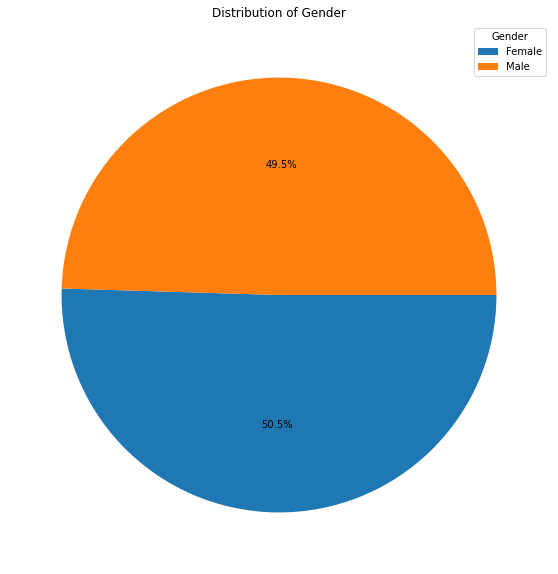

In [72]:
# pie chart of the gender distribution
plt.figure(figsize=(30,10))
plt.pie(data['Gender'].value_counts(), counterclock = False, autopct = '%1.1f%%');

# Set the plot's title and legend
plt.title("Distribution of Gender")
plt.legend(['Female', 'Male'], title = 'Gender');

_Male -> 49.5% and Female -> 50.5% , this shows that the  ratio of male to female students are almost equal, meaning there's no gender bias in the data_

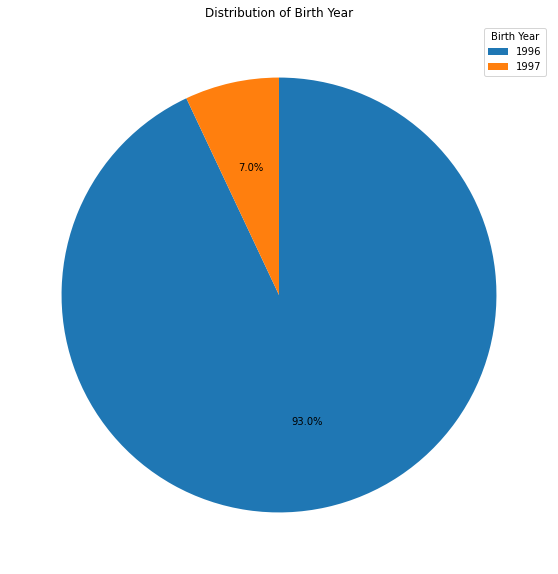

In [73]:
# pie chart for the birth years
plt.figure(figsize=(30,10))
plt.pie(data['Birth Year'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.title("Distribution of Birth Year")
plt.legend(['1996', '1997'], title = 'Birth Year');

1996 -> 93.0% and 1997 -> 7.0% , this shows that the majority of students where born in the year 1996

**Family Demographics** : **The below plot answers questions(?) related to family**

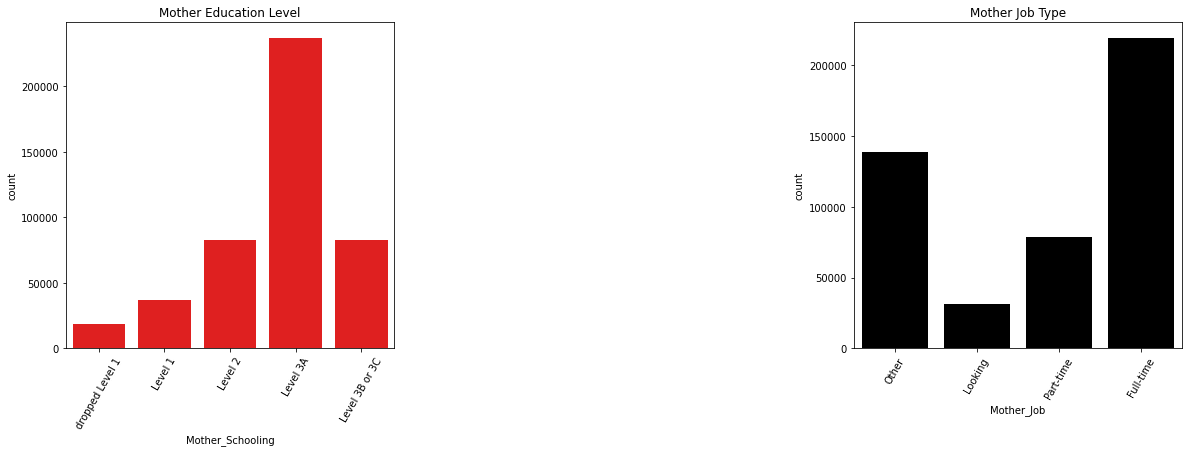

In [74]:
# Barchart of the mothers' schooling and job type

#schooling
plt.figure(figsize=(20,6))
plt.subplot(131)
sb.countplot(data = data, x = 'Mother_Schooling', color = 'red');
plt.xticks(rotation = 60);
plt.title("Mother Education Level");

#job type
plt.subplot(133)
sb.countplot(data = data, x = 'Mother_Job', color = 'black');
plt.xticks(rotation = 60);
plt.title("Mother Job Type");

The above plots tells that:

1. Level 3A appears to be the highest level of education reached by majority of the mothers(from developed countries)
2. Most Mothers appears to be working fulltime with lesser numbers looking for jobs, the others appears to be fulltime house wife.

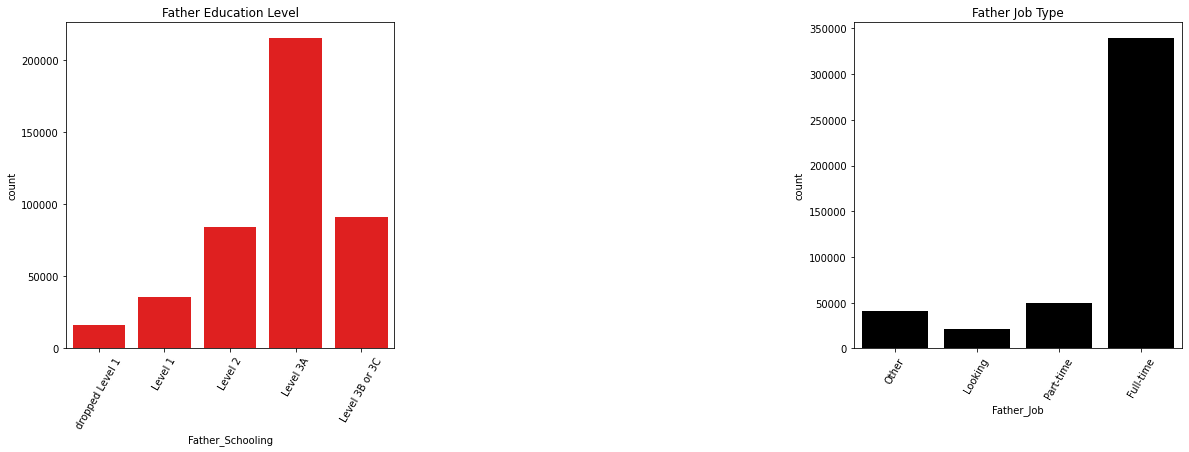

In [75]:
# Plot 1: Bar chart of the Fathers' schooling and Job type
# Mother_Schooling	Mother_Job	Father_Schooling	Father_Job

#schooling
plt.figure(figsize=(20,6))
plt.subplot(131)
sb.countplot(data = data, x = 'Father_Schooling', color = 'red');
plt.xticks(rotation = 60);
plt.title("Father Education Level");

# job type
plt.subplot(133)
sb.countplot(data = data, x = 'Father_Job', color = 'black');
plt.xticks(rotation = 60);
plt.title("Father Job Type");

The above plots tells that:

1. Level 3A appears to be the highest level of education reached by majority of the Fathers
2. Most Fathers appears to be working fulltime with lesser numbers looking for jobs.

**There is no significant diffrence between the plot showing mothers and fathers education levels**

**The below plot answers questions(?) related to regions in the dataset**

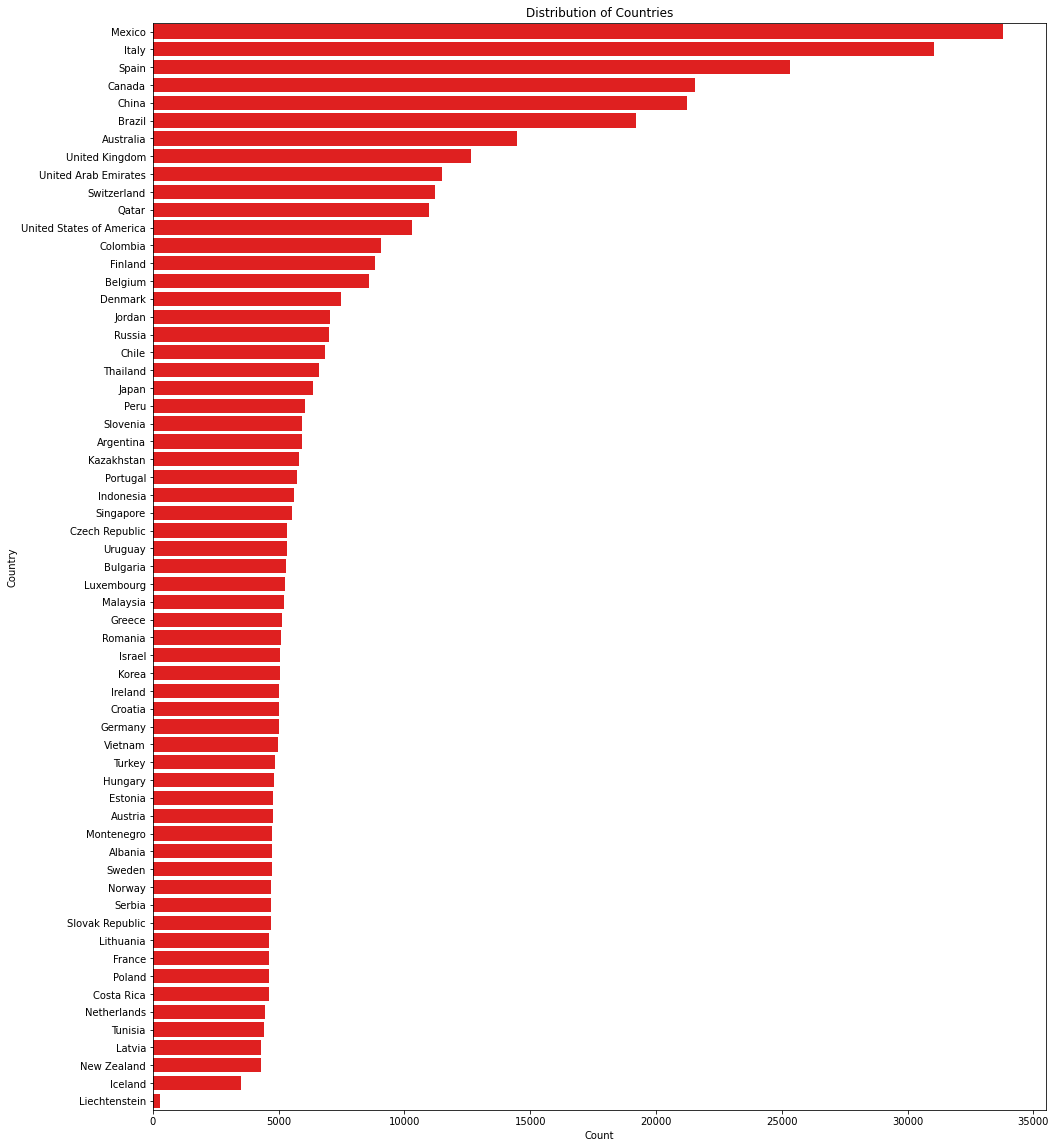

In [76]:
# Bar chart of the countries
plt.figure(figsize=[16,20])

order = data['Country'].value_counts().index
sb.countplot(data = data, y = 'Country', order = order, color='red');
plt.title("Distribution of Countries")
plt.ylabel("Country")
plt.xlabel('Count');

_From the above plot Mexico, Italy, Spain, Canada tops the chart with highest number of experiments instances with Liechtenstien having the lowest_

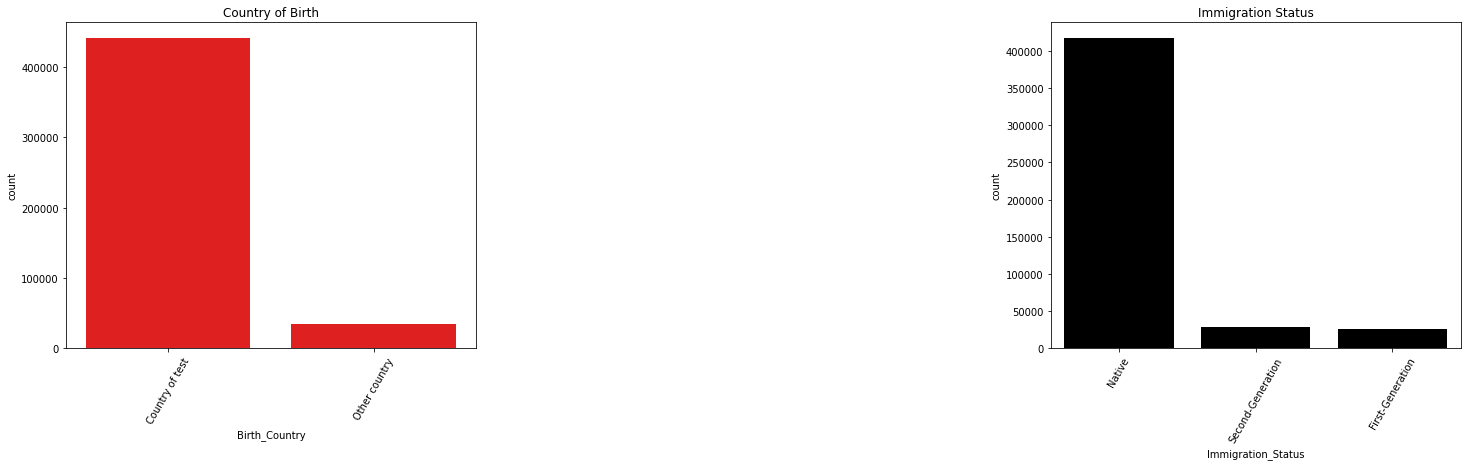

In [77]:
# Bar chart of the immigration status and Country Birth of students

# immigration status
plt.figure(figsize=(25,6))
plt.subplot(131)
sb.countplot(data = data, x = 'Birth_Country', color = 'red');
plt.xticks(rotation = 60);
plt.title("Country of Birth");

# birth country
plt.subplot(133)
sb.countplot(data = data, x = 'Immigration_Status', color = 'black');
plt.xticks(rotation = 60);
plt.title("Immigration Status");

The above plots tells that:

1. plot one shows that majority of the students resides the country they took the test
2. plot two shows that majority of students that took part in the test are native of the country

**The below plot answers questions(?) related to electronic gadgets and books in the dataset**

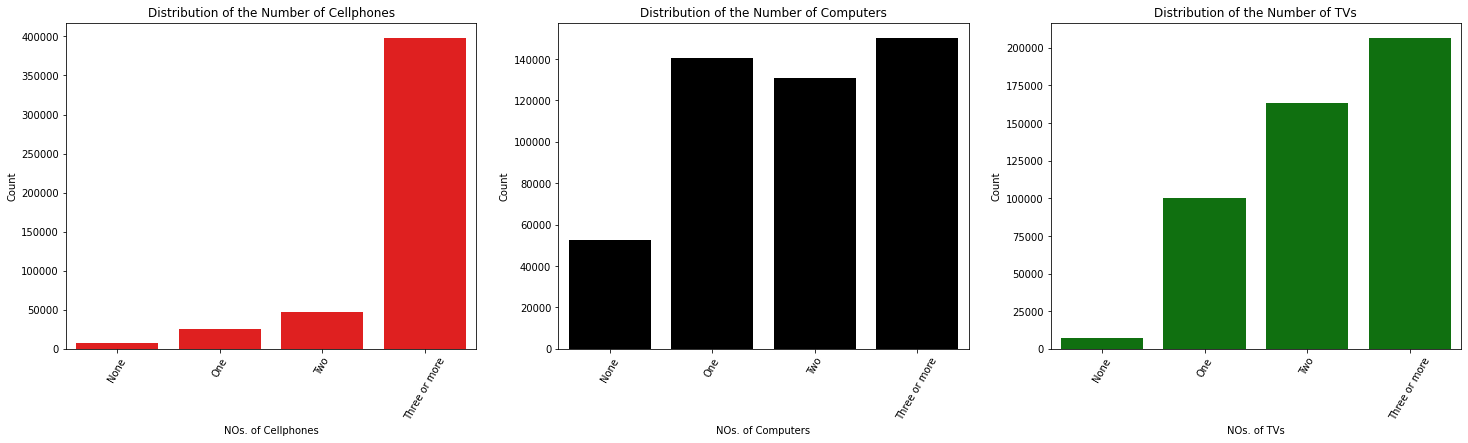

In [78]:
#Bar chart for the number of Cellphones, Computers, TVs

# Cellphones
plt.figure(figsize=(25,6))
plt.subplot(131)
sb.countplot(data = data, x = 'No_Cellphones', color = 'red');
plt.xticks(rotation = 60);
plt.title("Distribution of the Number of Cellphones");
plt.xlabel("NOs. of Cellphones")
plt.ylabel('Count');

# Computers
plt.subplot(132)
sb.countplot(data = data, x = 'No_Computers', color = 'black');
plt.xticks(rotation = 60);
plt.title("Distribution of the Number of Computers")
plt.xlabel("NOs. of Computers")
plt.ylabel('Count');

# TVs
plt.subplot(133)
sb.countplot(data = data, x = 'No_TVs', color = 'green');
plt.xticks(rotation = 60);
plt.title("Distribution of the Number of TVs")
plt.xlabel("NOs. of TVs")
plt.ylabel('Count');


The above plots tells that:

1. Majority number of the students likely have three or more cellphones
2. Student are likely to have at least one computers at home.
3. Every home is likely to have at least a Television set.

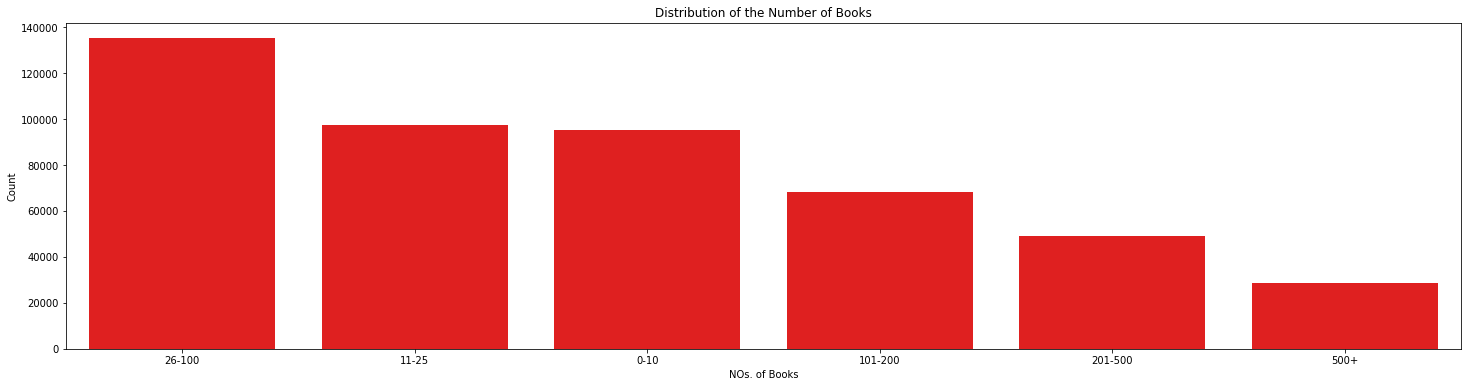

In [79]:
# Bar chart of the number of books

plt.figure(figsize=(25,6))
gen_order = data['No_Books'].value_counts().index

sb.countplot(data = data, x = 'No_Books', color='red', order=gen_order);

plt.title("Distribution of the Number of Books")
plt.xlabel("NOs. of Books")
plt.ylabel('Count');

_Majority of the students have about 26-100 books, with fewer students having 500+ books_

**The below plot answers questions(?) related to teachers in the dataset**

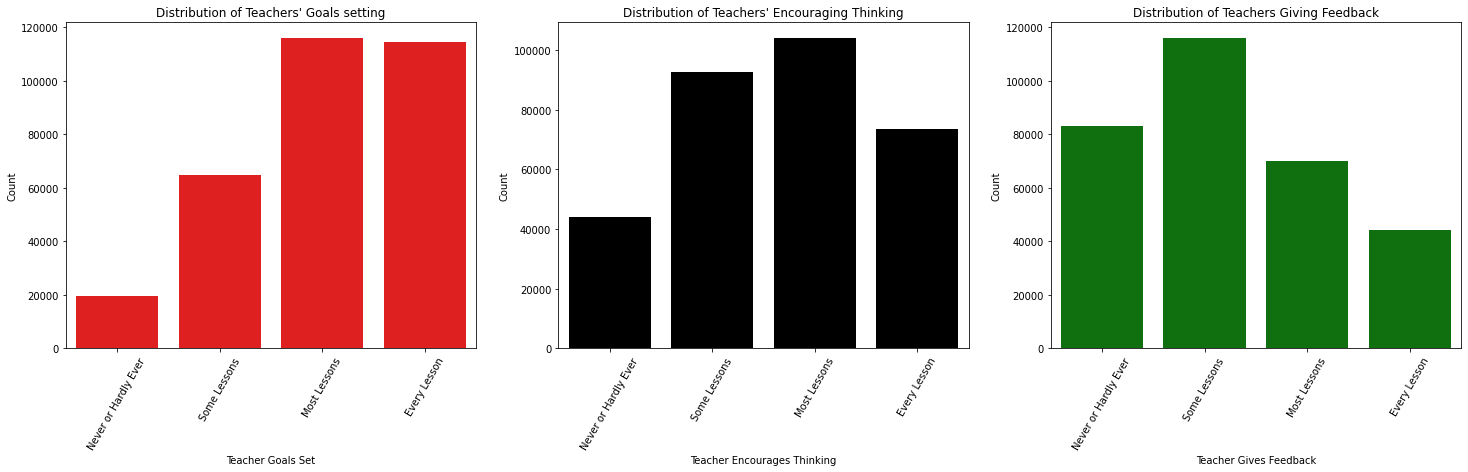

In [80]:
#Bar chart of the teachers setting goals, encouraging thinking, giving feedbacks

# teachers setting goals
plt.figure(figsize=(25,6))
plt.subplot(131)
sb.countplot(data = data, x = 'Teacher_Sets_Goals', color = 'red');
plt.xticks(rotation = 60);
plt.title("Distribution of Teachers' Goals setting")
plt.xlabel("Teacher Goals Set")
plt.ylabel('Count');

# teachers encouraging thinking
plt.subplot(132)
sb.countplot(data = data, x = 'Teacher_Encourages_Thinking', color = 'black');
plt.xticks(rotation = 60);
plt.title("Distribution of Teachers' Encouraging Thinking")
plt.xlabel("Teacher Encourages Thinking")
plt.ylabel('Count');

# teachers giving feedbacks
plt.subplot(133)
sb.countplot(data = data, x = 'Teacher_Gives_Feedback', color = 'green');
plt.xticks(rotation = 60);
plt.title("Distribution of Teachers Giving Feedback")
plt.xlabel("Teacher Gives Feedback")
plt.ylabel('Count');

The above plots tells that:
1. Teachers set the goals in most of the lessons

2. Teachers encourage thinking in most of the lessons

3. Teachers give feedback to the students in some of the lessons


## Plotting of quantitative variables.

**The below plot answers questions(?) related to study time and class size in the dataset**

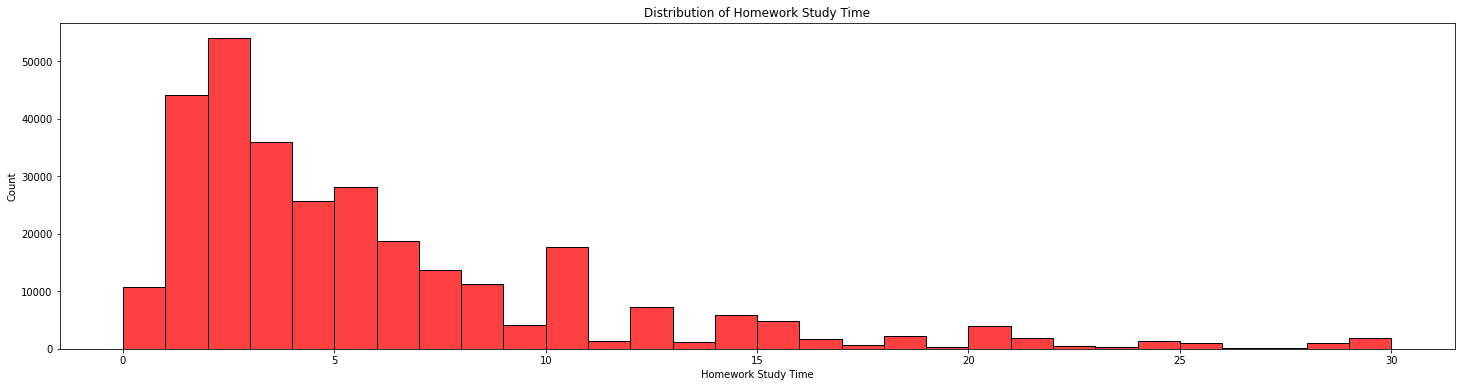

In [81]:
# Histogram showing distribution of home work study time

plt.figure(figsize=(25,6))
bins = np.arange(0, data['Homework_Study_Time'].max()+1, 1);
sb.histplot(data = data, x = 'Homework_Study_Time', bins = bins, color="red"); 

plt.title("Distribution of Homework Study Time")
plt.xlabel("Homework Study Time")
plt.ylabel('Count');

The above plots tells that: _The data is is highly skewed to the right, shows that most students spend 1-3 hours to study outside class for their homework._ 

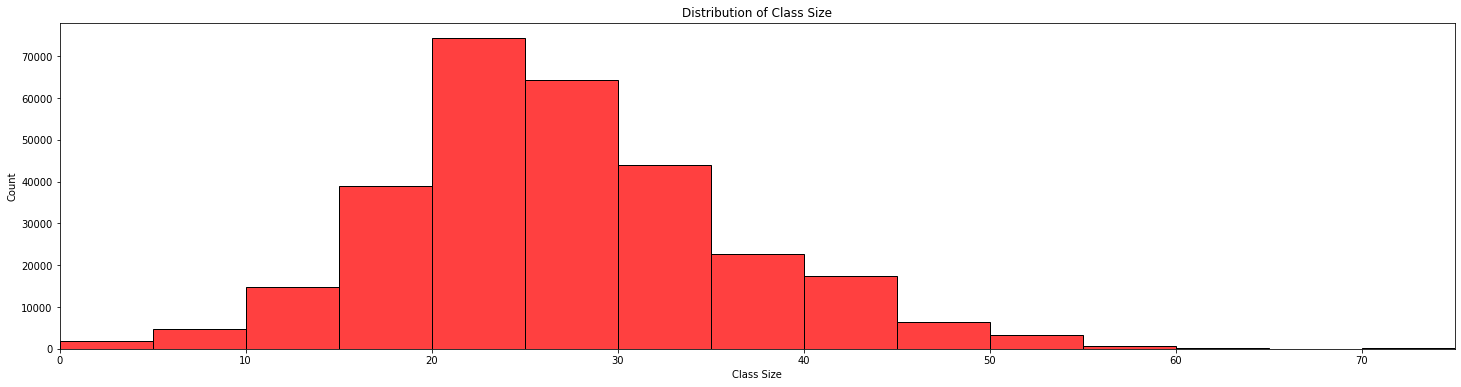

In [82]:
# Histogram showing distribution of the class sizes

plt.figure(figsize=(25,6))
bins = np.arange(0, data['Class_Size'].max()+5, 5);
sb.histplot(data = data, x = 'Class_Size', bins = bins, color="red"); 

plt.xlim((0,75));

plt.title("Distribution of Class Size")
plt.xlabel("Class Size")
plt.ylabel('Count');

The above plots tells that: _The data is slightly skewed to the right. Most of the class size are between around 20 and 30 students._

**The below plot answers questions(?) related to students scores in the dataset**

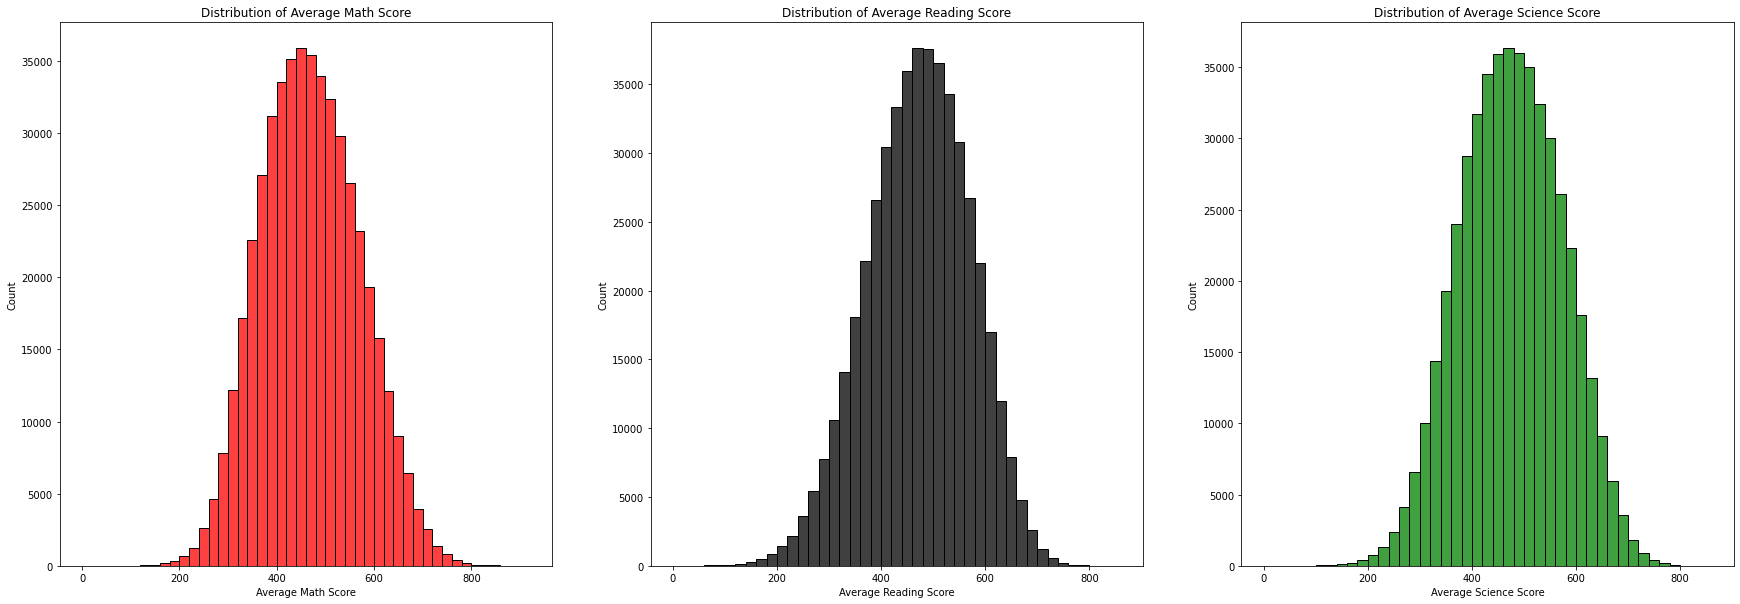

In [83]:
# Histogram showing the distribution Average Math Score, Average Reading Score, Average Science Score
plt.figure(figsize=(30,10))

# Histogram of the math scores
plt.subplot(131)
bins = np.arange(0, data['Average Math Score'].max()+20, 20);
sb.histplot(data = data, x = 'Average Math Score', bins = bins, color="red");  
plt.title("Distribution of Average Math Score")
plt.xlabel("Average Math Score")
plt.ylabel('Count');


# Histogram of the reading scores
plt.subplot(132)
bins = np.arange(0, data['Average Reading Score'].max()+20, 20);
sb.histplot(data = data, x = 'Average Reading Score', bins = bins, color="black"); 
plt.title("Distribution of Average Reading Score")
plt.xlabel("Average Reading Score")
plt.ylabel('Count');


#Histogram of the science scores
plt.subplot(133)
bins = np.arange(0, data['Average Science Score'].max()+20, 20);
sb.histplot(data = data, x = 'Average Science Score', bins = bins, color="green");
plt.title("Distribution of Average Science Score")
plt.xlabel("Average Science Score")
plt.ylabel('Count');

_From the above plot, Average Math Score,Average Reading Score,Average Science Score appears to follow a normal distribution, telling that students that performs well in any of the subject, tends to perform better at others too_ 

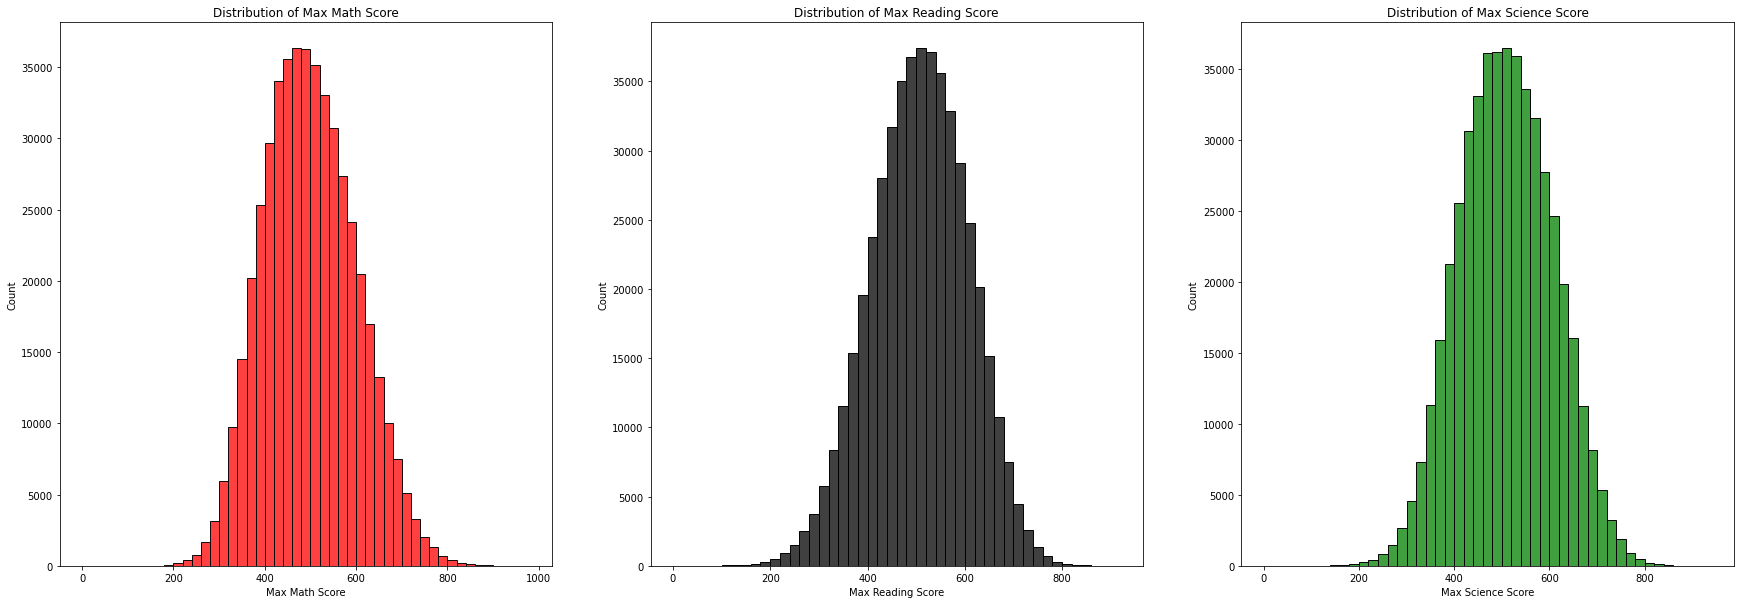

In [84]:
# Histogram showing distribution of Max Math Score,	Max Reading Score,	Max Science Score
plt.figure(figsize=(30,10))

plt.subplot(131)
bins = np.arange(0, data['Max Math Score'].max()+20, 20);
sb.histplot(data = data, x = 'Max Math Score', bins = bins, color="red");  
plt.title("Distribution of Max Math Score")
plt.xlabel("Max Math Score")
plt.ylabel('Count');


# Plot 19: Histogram of the reading scores
plt.subplot(132)
bins = np.arange(0, data['Max Reading Score'].max()+20, 20);
sb.histplot(data = data, x = 'Max Reading Score', bins = bins, color="black"); 
plt.title("Distribution of Max Reading Score")
plt.xlabel("Max Reading Score")
plt.ylabel('Count');


#Histogram of the science scores
plt.subplot(133)
bins = np.arange(0, data['Max Science Score'].max()+20, 20);
sb.histplot(data = data, x = 'Max Science Score', bins = bins, color="green");
plt.title("Distribution of Max Science Score")
plt.xlabel("Max Science Score")
plt.ylabel('Count');

_From the above plot, Max Math Score, Max Reading Score, Max Science Score appears to follow a normal distribution, telling that students that performs well in any of the subject, tends to perform better at others too_ 

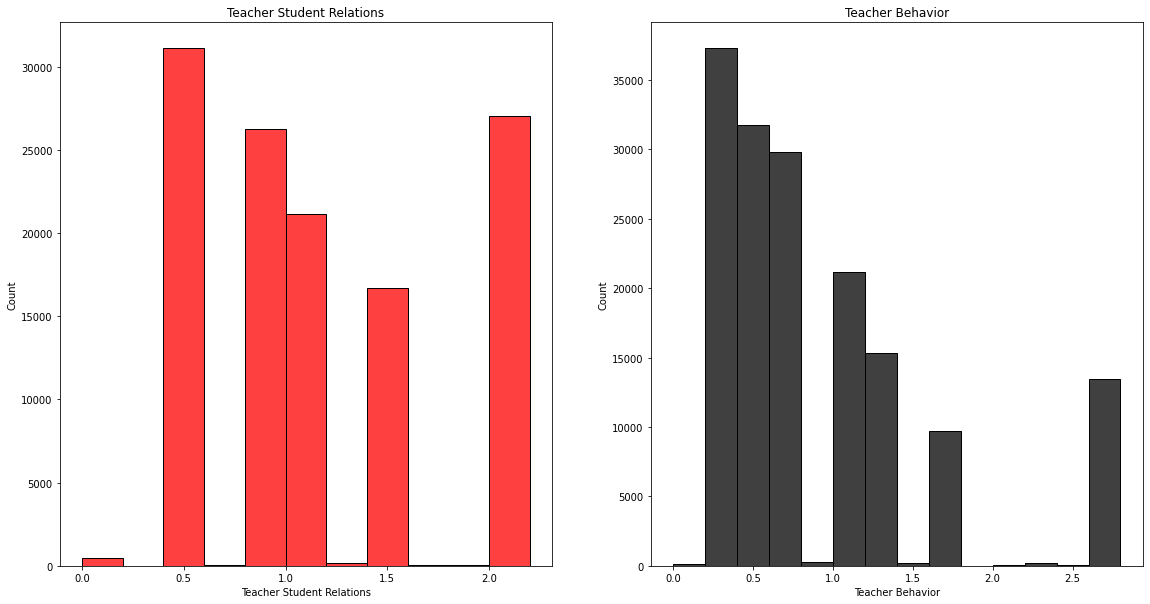

In [85]:
plt.figure(figsize=(30,10))

# Histogram of Teacher Student Relations
plt.subplot(131)
bins = np.arange(0, data['Teacher Student Relations'].max()+0.2, 0.2);
sb.histplot(data = data, x = 'Teacher Student Relations', bins = bins, color="red");  
plt.title("Teacher Student Relations")
plt.xlabel("Teacher Student Relations")
plt.ylabel('Count');


# Histogram of Teacher Behaviour
plt.subplot(132)
bins = np.arange(0, data['Teacher Behavior'].max()+0.2, 0.2);
sb.histplot(data = data, x = 'Teacher Behavior', bins = bins, color="black"); 
plt.title("Teacher Behavior")
plt.xlabel("Teacher Behavior")
plt.ylabel('Count');

The above plot shows that:
1. Teacher Student Relation Varies Among Students.
2. Teacher Behaviours is Mostly Skewed the left side. 

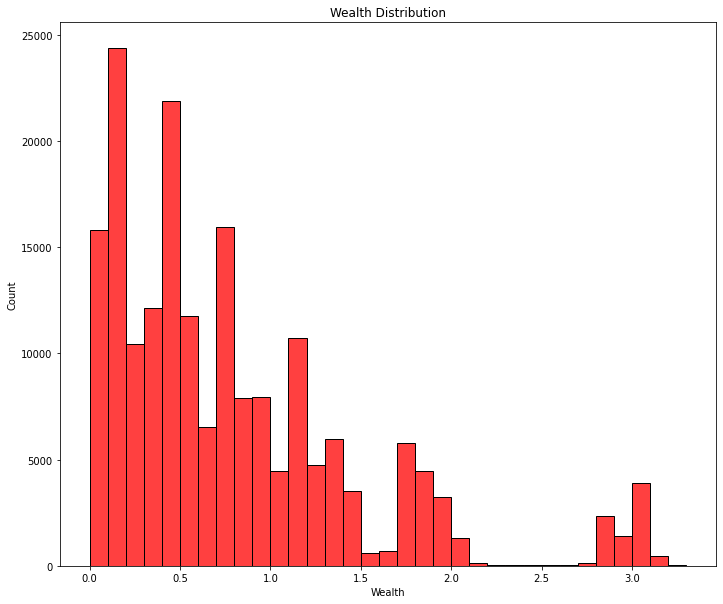

In [86]:
# Histogram Showing Distribution of wealth

plt.figure(figsize=(40,10))
plt.subplot(132)
bins = np.arange(0, data['Wealth'].max()+0.1, 0.1);
sb.histplot(data = data, x = 'Wealth', bins = bins, color="red"); 
plt.title("Wealth Distribution")
plt.xlabel("Wealth")
plt.ylabel('Count');

_From the plot above the data is skewed to the right, this tells that majority of the students are from average families_

Having come to the end of the univariate exploration, variables appear to be evenly distributed based of thier charateristics, with no unusual distribution among the plots.

N\B: each plots have a description underneath it.

## Bivariate Exploration

In this section, Exploration focuses on the realationship between two variables

 
 Question: Pair plot showing relationship between "Average Math Score", "Average Reading Score", "Average Science Score 



<Figure size 7200x3600 with 0 Axes>

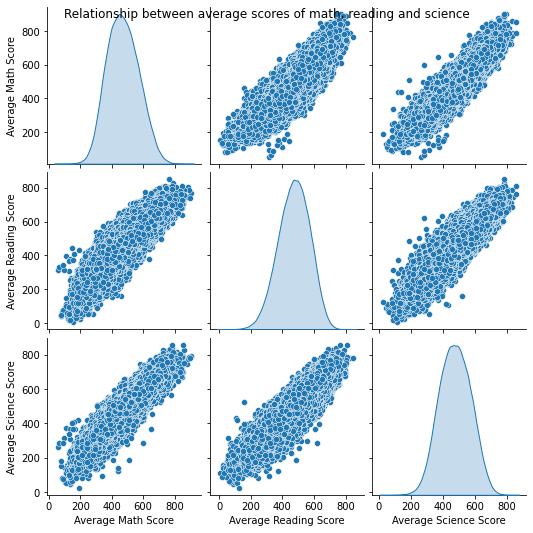

In [87]:
print(""" \n Question: Pair plot showing relationship between "Average Math Score", "Average Reading Score", "Average Science Score \n""")

plt.figure(figsize=(100,50));
pair_plot = sb.pairplot(data = data, vars=["Average Math Score", "Average Reading Score", "Average Science Score"], diag_kind='kde');
pair_plot.fig.suptitle("Relationship between average scores of math, reading and science");

_The above plot shows that scores from different subjects are highly(positive) correlated, with a normal distribution_ 

 
 Question: Pair plot showing relationship between 'Homework_Study_Time', 'Class_Size', 'Maths_Score', 'Reading_Score', 'Science_Score 



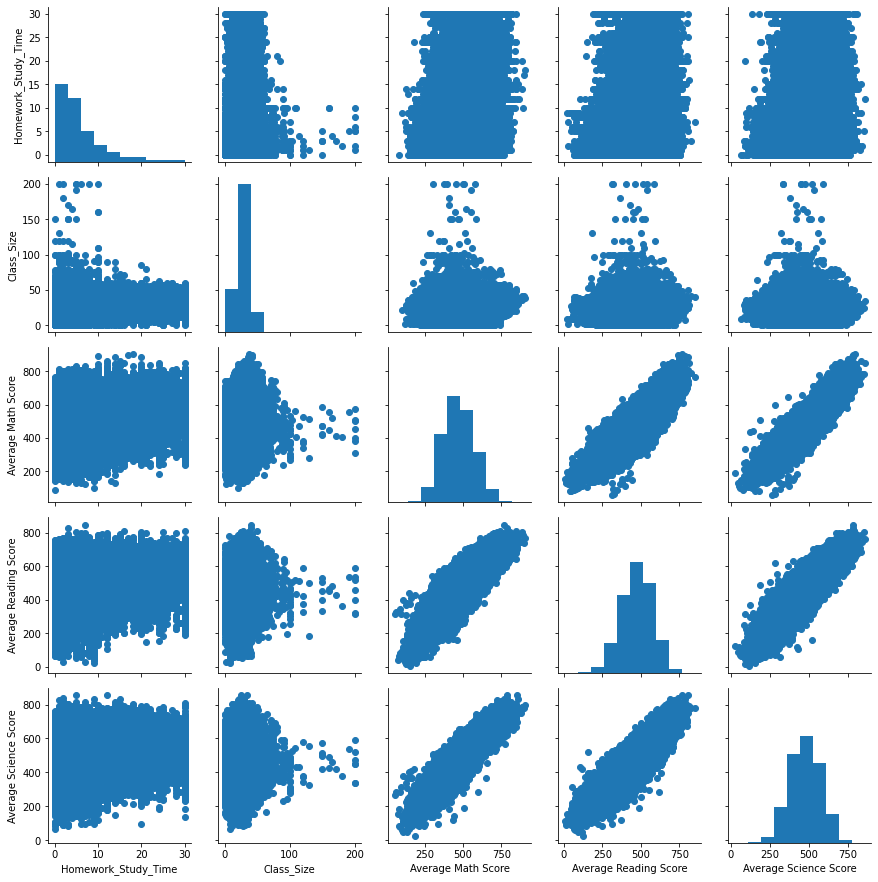

In [88]:
print(""" \n Question: Pair plot showing relationship between 'Homework_Study_Time', 'Class_Size', 'Maths_Score', 'Reading_Score', 'Science_Score \n""")

g = sb.PairGrid(data = data, vars = ['Homework_Study_Time', 'Class_Size', 'Average Math Score', 'Average Reading Score', 'Average Science Score']);
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

_The above plot shows that scores from diffrent subjects are highly(positive) correlated, with a normal distribution, The rest of the scatter plots don't show correlations._

_The homework study time and the class size are both skewed to the right, and the maths, reading and science scores have uniform distribution._

 
 Question: Bivariate Plot showing distribution of average scores in each subject relating to gender  
 


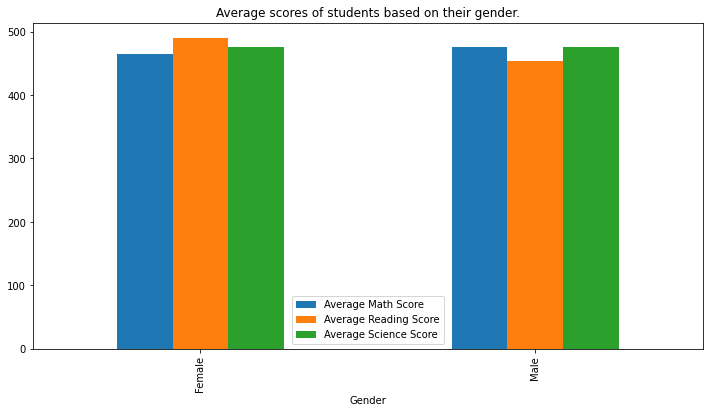

In [89]:
print(""" \n Question: Bivariate Plot showing distribution of average scores in each subject relating to gender  \n """)

val = data.groupby(['Gender']).mean()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
ax = val.plot.bar(figsize=(12,6));
plt.title('Average scores of students based on their gender.');

_Plot shows that both genders performs the same way on average_

**The below plot answers questions(?) related to math score, birth year and birth country based of thier relationships**

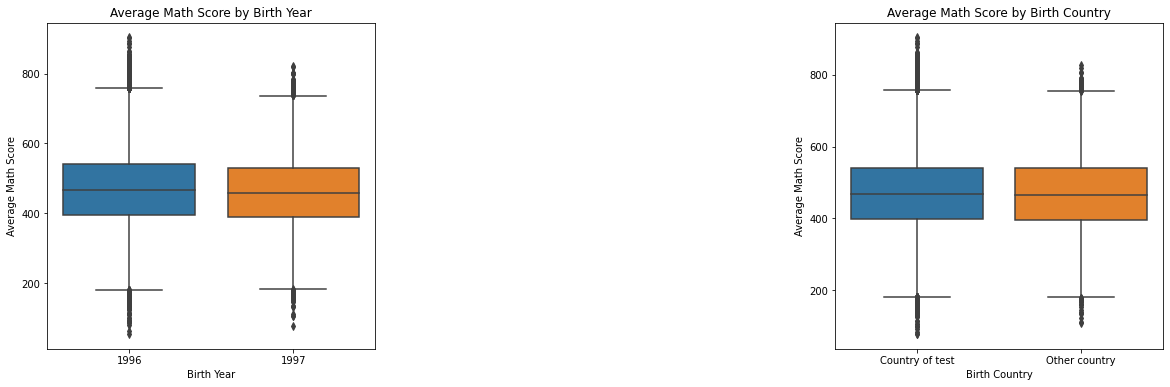

In [92]:
plt.figure(figsize=(20,6));

# Relationship between the birth year and Average Math Score
plt.subplot(131)
sb.boxplot(data = data, x = 'Birth Year', y = 'Average Math Score');
plt.title("Average Math Score by Birth Year")
plt.xlabel("Birth Year")
plt.ylabel('Average Math Score');

# Relationship between the birth country and the Average Math Score
plt.subplot(133)
sb.boxplot(data = data, x = 'Birth_Country', y = 'Average Math Score');
plt.title("Average Math Score by Birth Country")
plt.xlabel("Birth Country")
plt.ylabel('Average Math Score');

conclusion:
1. Plot shows that 1996 have slightly higher average math scores, this could result from the majority of the students were born in 1996 (93%).
2. Plot shows no significant difference between the birth countries and the average math scores. 

**The below plot answers questions(?) related to science score, Teachers Giving Feedback, Teachers Encouraging Thinking, Teachers Setting Goals based of thier relationships**

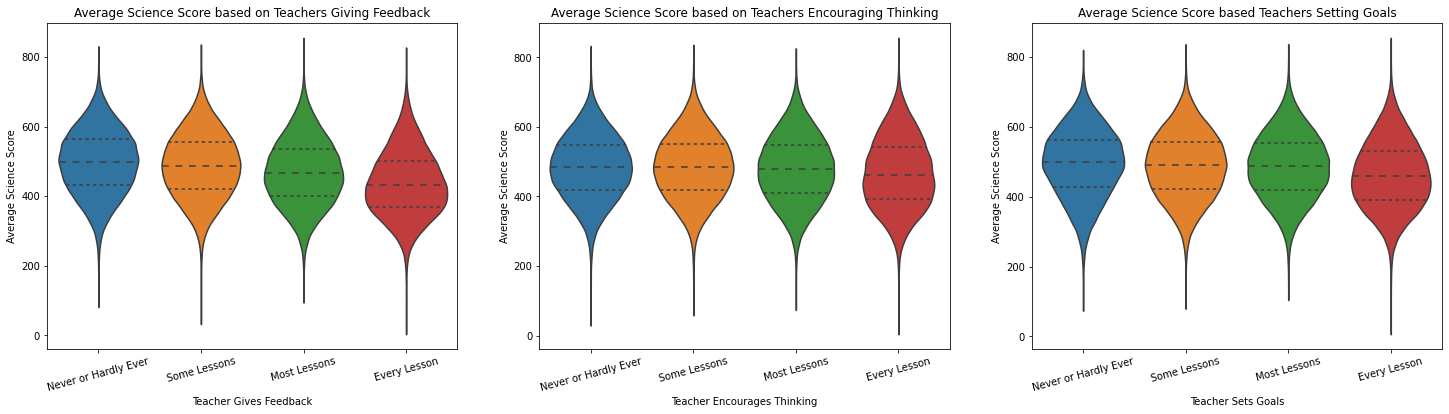

In [93]:
plt.figure(figsize=(25,6));

# Relationship between the teachers giving feedback and the Average Science Score
plt.subplot(131)
sb.violinplot(data = data, x = 'Teacher_Gives_Feedback', y = 'Average Science Score', inner = 'quartile');
plt.xticks(rotation = 15);
plt.title("Average Science Score based on Teachers Giving Feedback")
plt.xlabel("Teacher Gives Feedback")
plt.ylabel('Average Science Score');


# Relationship between the teachers encouraging thinking and the Average Science Score
plt.subplot(132)
sb.violinplot(data = data, x = 'Teacher_Encourages_Thinking', y = 'Average Science Score', inner = 'quartile');
plt.xticks(rotation = 15);
plt.title("Average Science Score based on Teachers Encouraging Thinking")
plt.xlabel("Teacher Encourages Thinking")
plt.ylabel('Average Science Score');

# Relationship between the teachers setting goals and Average Science Score
plt.subplot(133)
sb.violinplot(data = data, x = 'Teacher_Sets_Goals', y = 'Average Science Score', inner = 'quartile');
plt.xticks(rotation = 15);
plt.title("Average Science Score based Teachers Setting Goals")
plt.xlabel("Teacher Sets Goals")
plt.ylabel('Average Science Score');

_The above plot shows that, teachers giving feed back, Teachers Encouraging Thinking, Teachers Setting Goals have very little impacts on students average science scores_

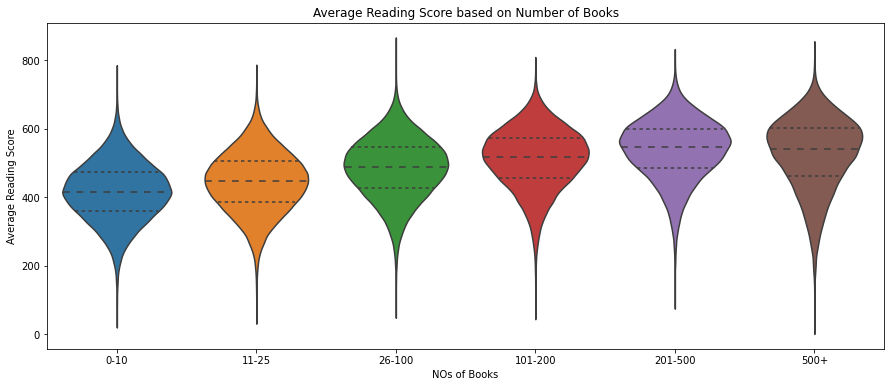

In [94]:
# Relationship between the number of books and the Average Reading Score

plt.figure(figsize=(15,6));
sb.violinplot(data = data, x = 'No_Books', y = 'Average Reading Score', inner = 'quartile');
plt.title("Average Reading Score based on Number of Books")
plt.xlabel("NOs of Books")
plt.ylabel('Average Reading Score');

_The above plot shows that, the higher the number of books a student have, the higher the chances of them scoring high in a reading test_

**The below plot answers questions(?) related to science score and number of electronic gadgets owned by student based of thier relationships**

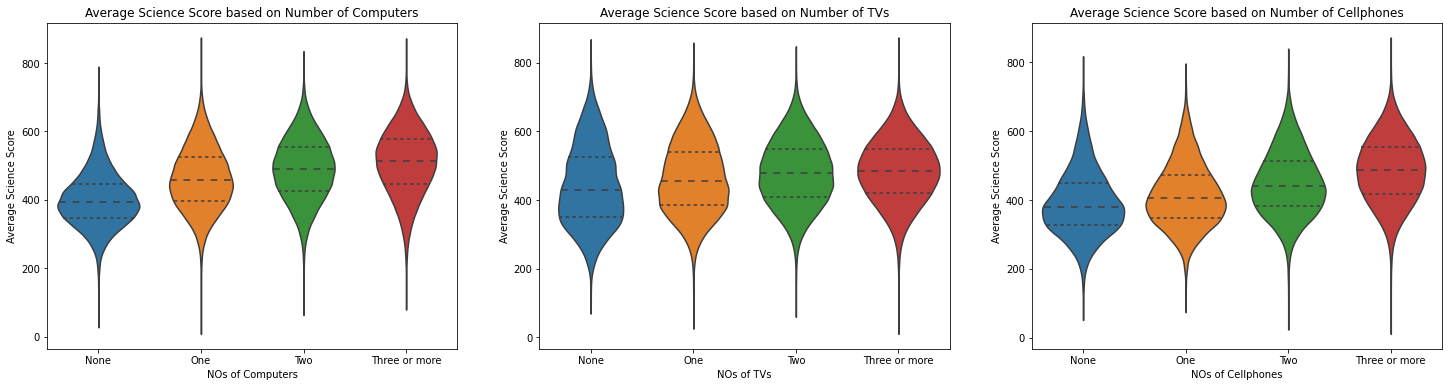

In [95]:
plt.figure(figsize=(25,6));

# Relationship between the number of computers and the Average Science Score
plt.subplot(131)
sb.violinplot(data = data, x = 'No_Computers', y = 'Average Science Score', inner = 'quartile')
plt.title("Average Science Score based on Number of Computers")
plt.xlabel("NOs of Computers")
plt.ylabel('Average Science Score');

# Relationship between the number of TVs and the Average Science Score
plt.subplot(132)
sb.violinplot(data = data, x = 'No_TVs', y = 'Average Science Score', inner = 'quartile');
plt.title("Average Science Score based on Number of TVs")
plt.xlabel("NOs of TVs")
plt.ylabel('Average Science Score');

# Relationship between the number of cellphones and the Average Science Score
plt.subplot(133)
sb.violinplot(data = data, x = 'No_Cellphones', y = 'Average Science Score', inner = 'quartile');
plt.title("Average Science Score based on Number of Cellphones")
plt.xlabel("NOs of Cellphones")
plt.ylabel('Average Science Score');

The above plot tells that:

1. The more computers a student owns, the more likely higher thier average science score.
2. The number of TVs and the average science score are positively correlated.
3. The number of cellphones and the average science score of students are positively correlated, as the number of cellphone increases, the total score increases.


**The below plot answers questions(?) related to math score and parent education based of thier relationships**

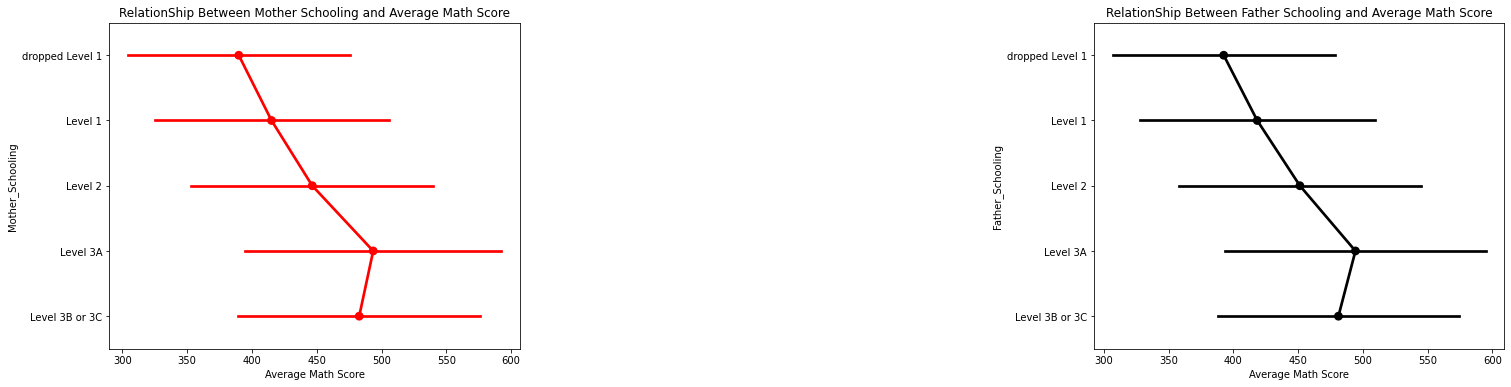

In [96]:
plt.figure(figsize=(25,6));

# plot showing the relationship between highest parental education and student average math score
plt.subplot(131)
sb.pointplot(data =data, y = 'Mother_Schooling', x = 'Average Math Score', ci = 'sd', color="red");
plt.title("RelationShip Between Mother Schooling and Average Math Score");


# plot showing the relationship between highest parental education and student average math score
plt.subplot(133)
sb.pointplot(data =data, y = 'Father_Schooling', x = 'Average Math Score', ci = 'sd', color="black");
plt.title("RelationShip Between Father Schooling and Average Math Score");

_From the plots above, it's obvious that both parents education plays a huge role on students performance_

**The below plot answers questions(?) related to math score and parent job type based of thier relationships**

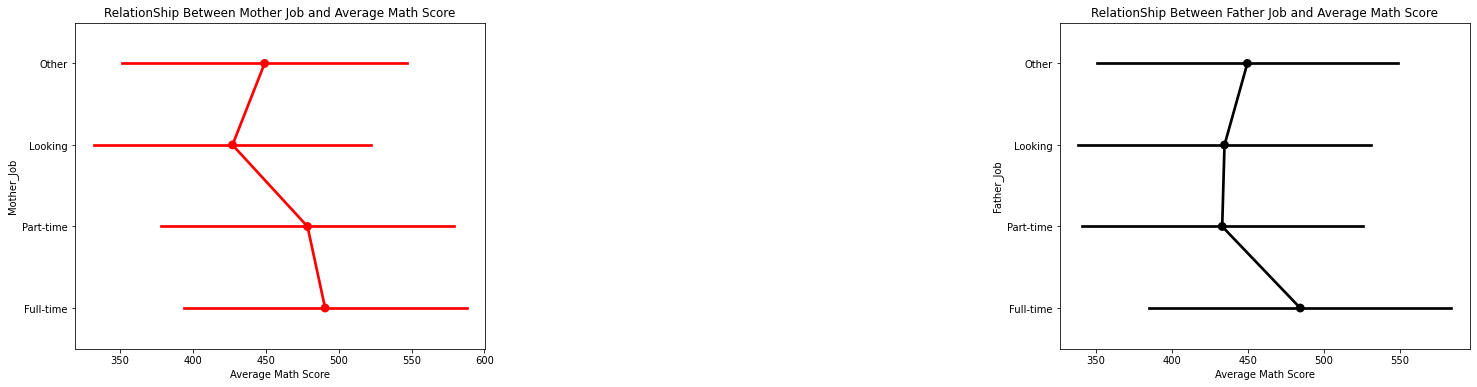

In [97]:
plt.figure(figsize=(25,6));

# plot showing the relationship between highest parental job and student math score
plt.subplot(131)
sb.pointplot(data =data, y = 'Mother_Job', x = 'Average Math Score', ci = 'sd', color="red");
plt.title("RelationShip Between Mother Job and Average Math Score");


# plot showing the relationship between highest parental job and student math score
plt.subplot(133)
sb.pointplot(data =data, y = 'Father_Job', x = 'Average Math Score', ci = 'sd', color="black");
plt.title("RelationShip Between Father Job and Average Math Score");

_From the plots above, it's obvious that both parents job levels plays a huge role on students performance_

**The below plot answers questions(?) related to students counts and number of cellphones and books based of thier relationships**

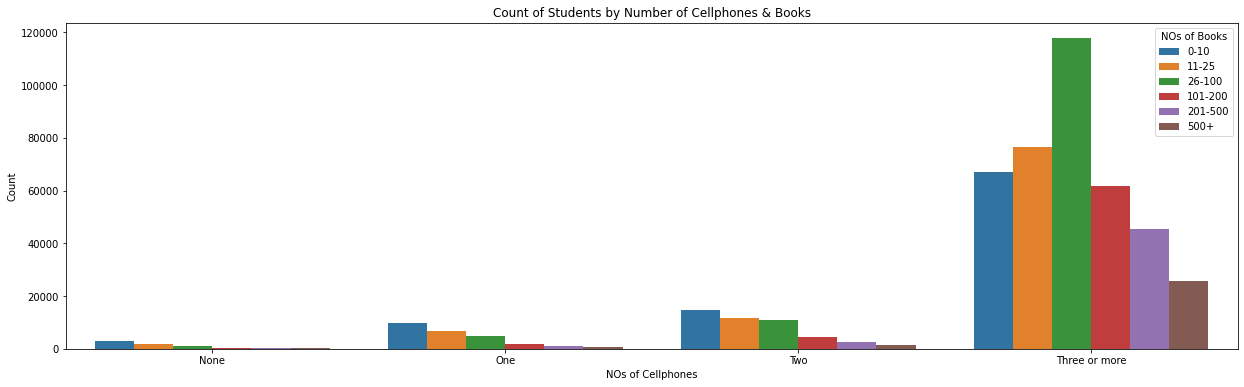

In [98]:
plt.figure(figsize=(21,6));

# Relationship between the number of cellphones and books and students counts
sb.countplot(data = data, x = 'No_Cellphones', hue = 'No_Books');
plt.title("Count of Students by Number of Cellphones & Books")
plt.ylabel('Count')
plt.xlabel('NOs of Cellphones')
plt.legend(title="NOs of Books");

_Plot shows, more phones, more books and more students move together_

**The below plot answers questions(?) related to math scores and country based of thier relationships**

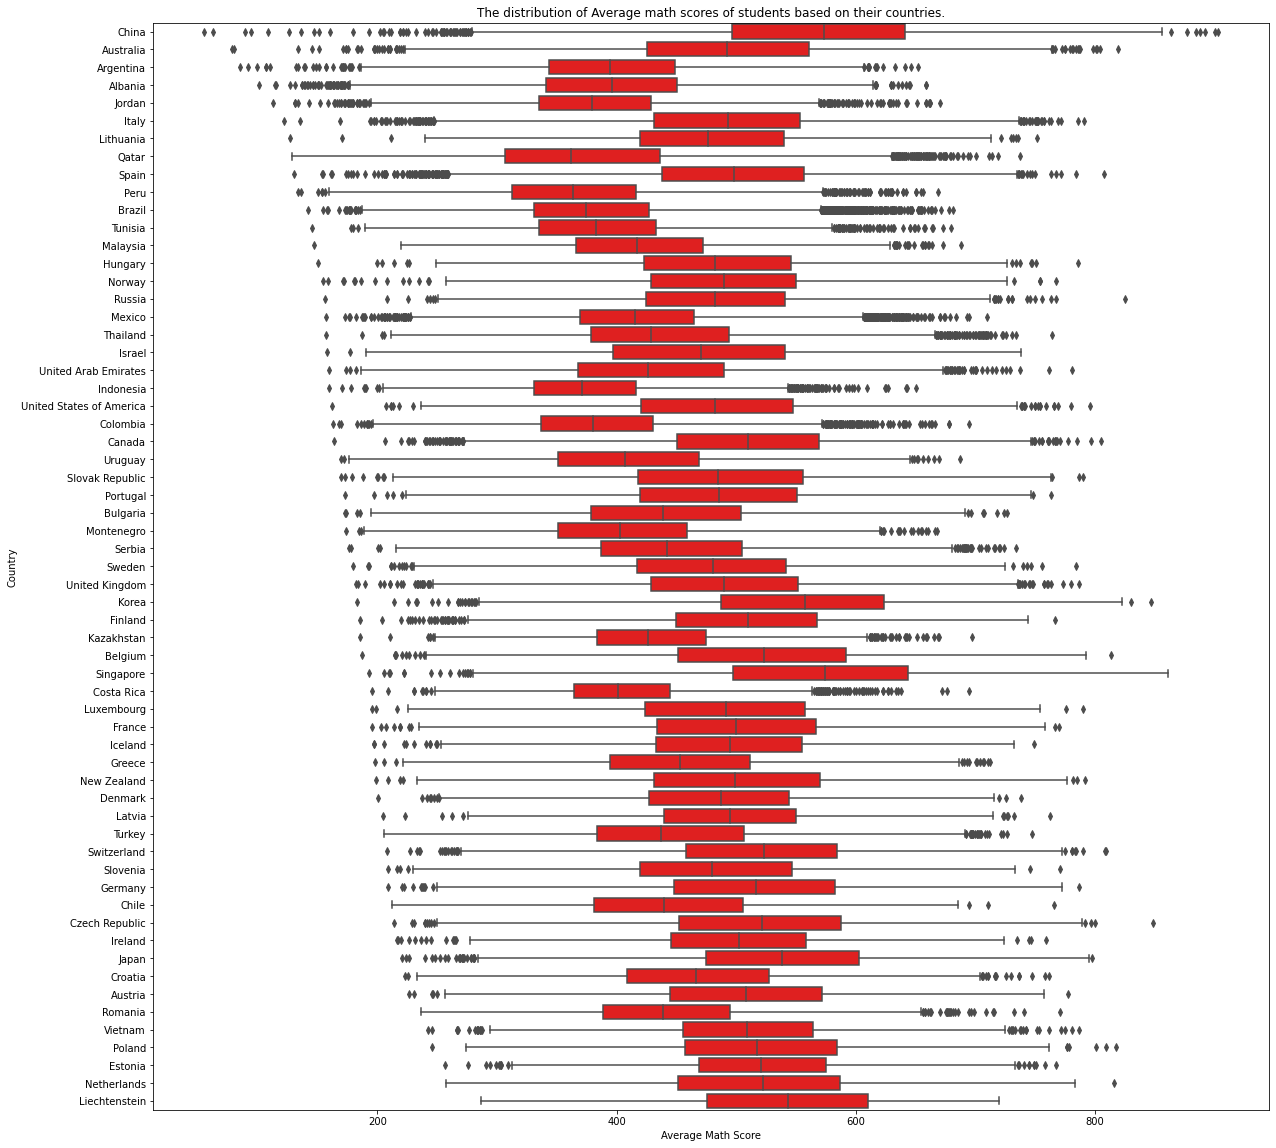

In [99]:
# distribution of average math scores of students based on their countries

plt.figure(figsize = [20, 20])
sorted = data.sort_values(by='Average Math Score')
sb.boxplot(x = sorted['Average Math Score'], y = sorted['Country'], color='red');
plt.title('The distribution of Average math scores of students based on their countries.');

_from the above plot, china, korea, singapore and united kindom seems to have the highest average math score. Dosen't really entail that students from this countries will always perform better on average_

**The below plot answers questions(?) related to teachers behaviour and country based of thier relationships**

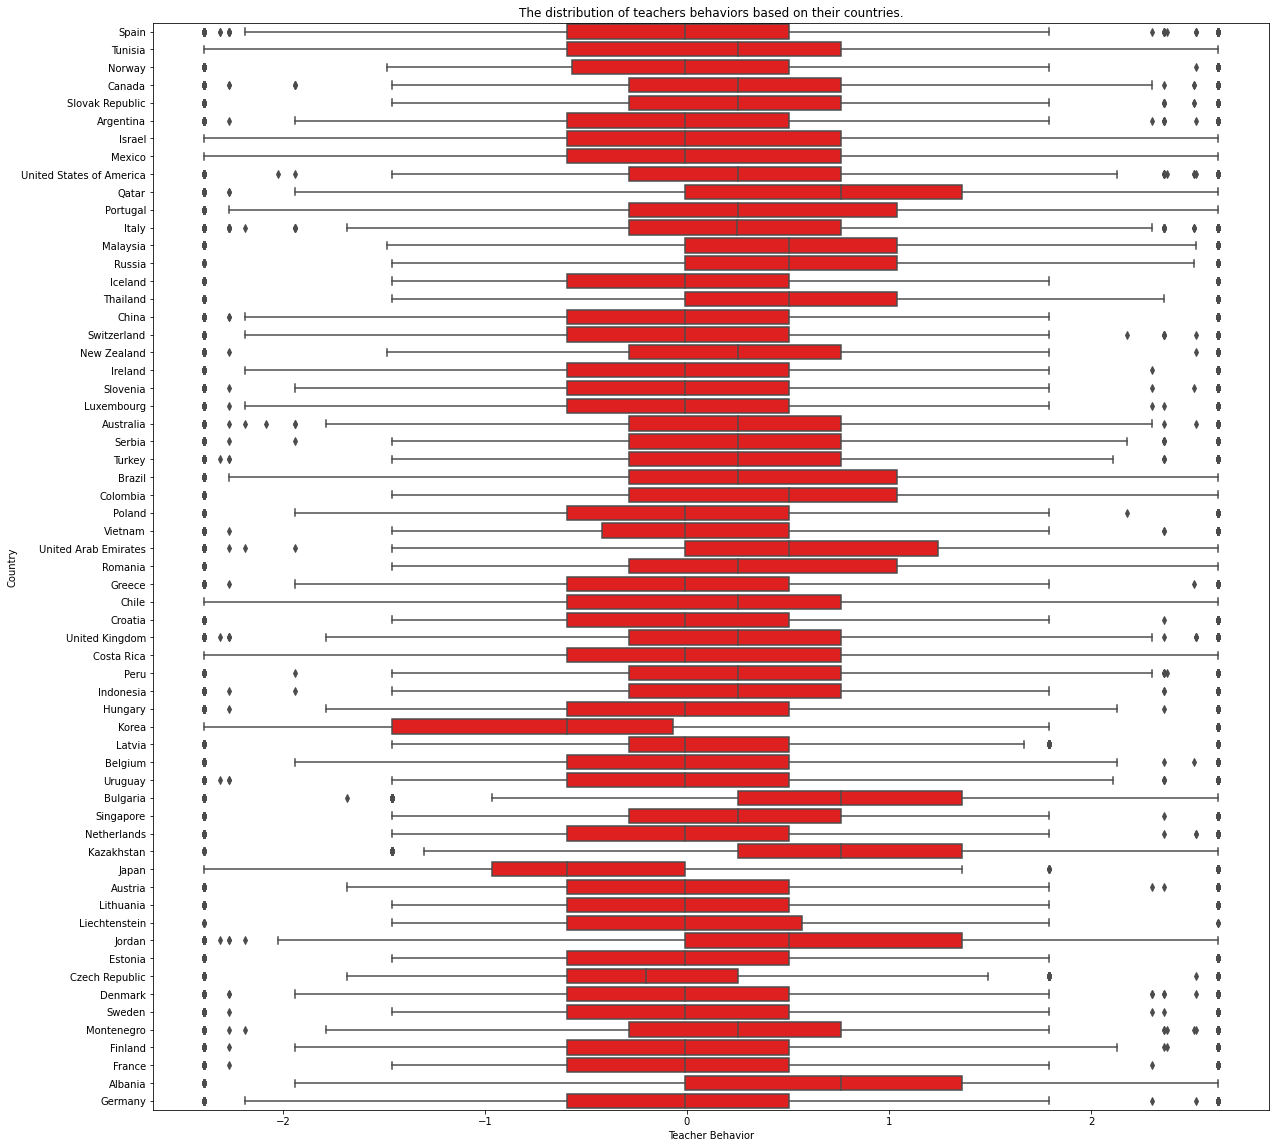

In [100]:
#distribution of teachers behaviors based on their countries.

plt.figure(figsize = [20, 20])
sorted = data.sort_values(by='Teacher Behavior')
sb.boxplot(x = sorted['Teacher Behavior'], y = sorted['Country'], color='red');
plt.title('The distribution of teachers behaviors based on their countries.');

_Plot shows that Teachers from Quatar, United Arab Emirates, Bulgaria, Kazakhstan, Jordan and Albania have better behaviors and relations with students_

## Bivariate Exploration Conclusion:

- Plot shows, more phones, more books and more students move together
- it's obvious that both parents job levels and education level plays a huge role on students performance
- The Diffrent subjects are highly(positive) correlated, with a normal distribution, The rest of the scatter plots don't show correlations. The homework study time and the class size are both skewed to the right, and the maths, reading and science scores have uniform distribution.
- the higher the number of books a student have, the higher the chances of them scoring high in a reading test

## Multivariate Exploration

In this section, Exploration focuses on the realationship between three or more variables

**The below plot answers question(?) related homework study time vs. the total score based on the number of cellphones**

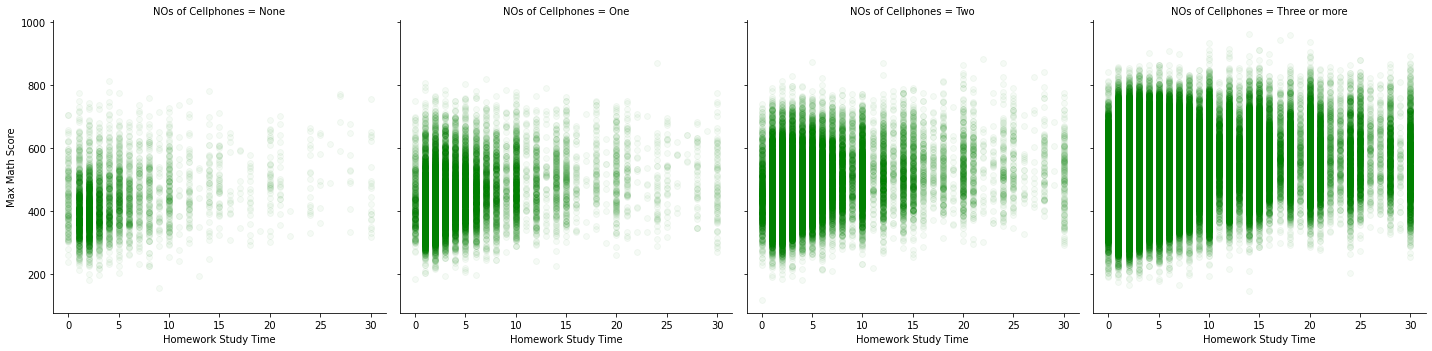

In [101]:
# Plotting the homework study time vs. the total score based on the number of cellphones

g = sb.FacetGrid(data = data, col = 'No_Cellphones', height = 5)
g.map(plt.scatter, 'Homework_Study_Time', 'Max Math Score', alpha = 1/25, color='green');

# Set the column titles and the labels
g.set_titles(col_template="NOs of Cellphones = {col_name}", row_template="{row_name}")
g.set_axis_labels("Homework Study Time", "Max Math Score");

_Based on the above plots, students with three or more cellphones spend more time studying resulting in higher math scores the reverse is the case with students with lesser cellphones_

**The below plot answers question(?) related average math score vs. wealth based on parent education level**

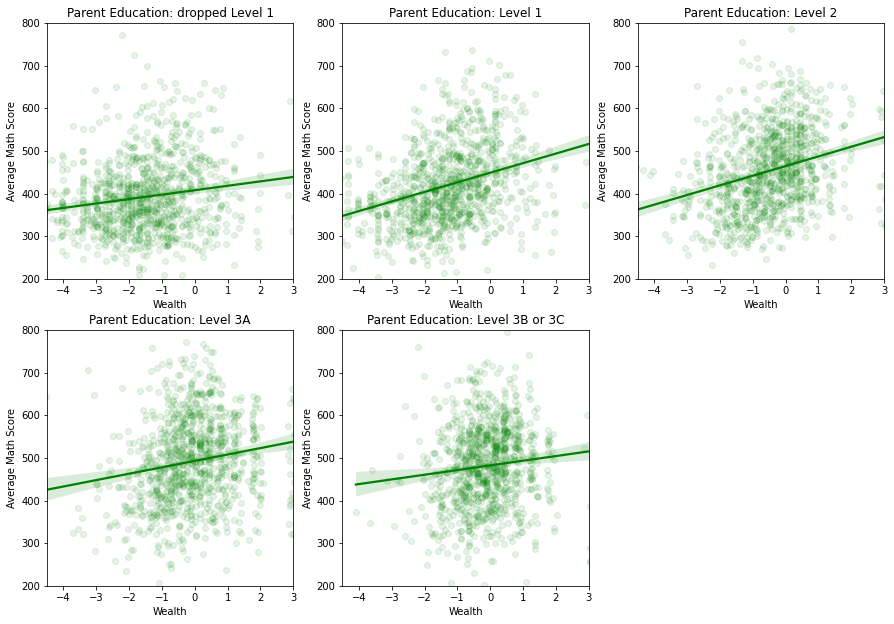

In [102]:
plt.figure(figsize = (15, 16));

# counter variable for proper subplot placement
i = 0;

# loop through each level of parental education from least to most
for _ in data.Father_Schooling.unique().sort_values():
    # if the level of parental education is given, then plot the graph
    if _ == _:
        plt.subplot(3,3,i+1)
        # label the graph with the appropriate level of education
        plt.title('Parent Education: {}'.format(_));
        # for consistent comparison, take a sample of 1000 from that level of parental education
        sub_data = data[data['Father_Schooling'] == _].sample(1000)
        sb.regplot(data = sub_data, x = 'Wealth', y = 'Average Math Score', scatter_kws = {'alpha':0.1}, color='green');
        plt.xlim(-4.5,3);
        plt.ylim(200,800);
        i += 1;

_Parents with higher educational level tends to be more wealthy which in turn shows student performing better at math. This dosen't actually meant that student from wealthy familes with educated parents are always going to perform better at math_

## Multivariate Exploration Conclusion:

- Students with three or more cellphones spend more time studying resulting in higher math scores the reverse is the case with students with lesser cellphones.
- Parents with higher educational level tends to be more wealthy which in turn shows student performing better at math. This dosen't actually meant that student from wealthy familes with educated parents are always going to perform better at math


<a id='conclusions'></a>

## Conclusion
Having Successfully Wrangling and Exploring the dataset, we've seen how diffrent factors ranging from gender, electronic gadgets, books, parents education, parents job, teacher relations, countries all play roles in the performance of a student. 
This was made possible by utilizing the right plots types and apropriate feature configurations.
The end gives insights on actions that can taken to help improve standard of education across diffrent regions